# Credit Card Approval Prediction

**Project proposal to predict credit card approval**

*"A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.*

*Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements."*

**Class imbalance is a common issue in credit card approval prediction tasks, and it's not uncommon to have a significantly higher number of instances belonging to one class (e.g., 'good' clients) than the other (e.g., 'bad' clients). The concept of a 'good' or 'bad' client is often defined based on historical data and specific criteria set by financial institutions.**

**While class imbalance is normal in these datasets, it can pose challenges during model training. Models might become biased towards the majority class, leading to suboptimal performance on the minority class. In the context of credit card approval prediction, misclassifying a 'bad' client as 'good' can have more severe consequences than the opposite.**

**To address this issue, we will use techniques like oversampling or using different evaluation metrics that consider both precision and recall. We will also employ advanced algorithms like Random Forest, and Boosting algorithms like XGBoost, which are known for their ability to handle imbalanced datasets better than traditional models like Logistic Regression, Decision Trees and K-Nearest Neighbors (KNN).**

**In summary, while class imbalance is expected in credit card approval datasets, we are aware of its impact on model performance and have employed appropriate strategies to mitigate any potential bias.**

## **Machine Learning Development LifeCycle (MLDLC)**

- Data Collection
- Data Preprocessing
- Explorartory Data Analysis (EDA)
- Handling Missing Values & Outliers
- Feature Engineering
- Model Selection
- Model Traning
- Testing & Optimizing
- Model Evaluation
- Model Interpretation

### Data Collection

In [1]:
# Importing required libaries

import numpy as np
import pandas as pd

# Visualization libaraires
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings("ignore")

- Here we have two dataset :

 1) The first dataset contains all the Dependent Variables.

 2) The second dataset contains the Independent Variable.

In [2]:
# Importing data

data = pd.read_csv('Credit_Card_Approval.csv/Credit_card.csv')
data_label = pd.read_csv('Credit_Card_Approval.csv/Credit_card_label.csv')
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
# Displaying the first few rows of a DataFrame to get a quick overview of the structure and content of the data

data_label.head()


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [4]:
# Checking dimensions of both datasets to understand the structure and size of the data.

data.shape, data_label.shape


((1548, 18), (1548, 2))

In [5]:
# Merging both files

cc = pd.merge(data, data_label, on='Ind_ID', how='inner')
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Data Preprocessing

In [6]:
# Creating a copy of the merged dataset for preprocessing and analysis

df = cc.copy()
null_df = pd.DataFrame(df.isnull().sum(), columns=['null_count'])

dtypes_df = pd.DataFrame(df.dtypes, columns=['data_type'])

null_dtypes = pd.concat([null_df,dtypes_df], axis=1)

# Checking null values and data types
null_dtypes

,null_count,data_type
Ind_ID,0,int64
GENDER,7,object
Car_Owner,0,object
Propert_Owner,0,object
CHILDREN,0,int64
Annual_income,23,float64
Type_Income,0,object
EDUCATION,0,object
Marital_status,0,object
Housing_type,0,object


In [7]:
# Checking for duplicates

df.duplicated().sum()

0

In [8]:
# checking column names for renaming

df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [9]:
column_name_mapping = {
    'Ind_ID': 'Individual_ID',
    'GENDER': 'Gender',
    'Car_Owner': 'Car_Owner',
    'Propert_Owner': 'Property_Owner',
    'CHILDREN': 'Number_of_Children',
    'Annual_income': 'Annual_Income',
    'Type_Income': 'Income_Type',
    'EDUCATION': 'Education_Level',
    'Marital_status': 'Marital_Status',
    'Housing_type': 'Housing_Type',
    'Birthday_count': 'Birthday_Count',
    'Employed_days': 'Employed_Days',
    'Mobile_phone': 'Mobile_Phone',
    'Work_Phone': 'Work_Phone',
    'Phone': 'Phone',
    'EMAIL_ID': 'Email_ID',
    'Type_Occupation': 'Occupation_Type',
    'Family_Members': 'Number_of_Family_Members',
    'label': 'Label'
}
df.rename(columns=column_name_mapping, inplace=True)


In [10]:
# checking for misiing values

df.isnull().sum()

Individual_ID                 0
Gender                        7
Car_Owner                     0
Property_Owner                0
Number_of_Children            0
Annual_Income                23
Income_Type                   0
Education_Level               0
Marital_Status                0
Housing_Type                  0
Birthday_Count               22
Employed_Days                 0
Mobile_Phone                  0
Work_Phone                    0
Phone                         0
Email_ID                      0
Occupation_Type             488
Number_of_Family_Members      0
Label                         0
dtype: int64

**There are missing values in four columns. We will treat them after EDA.**
1. Gender
2. Annual_Income
3. Birthday_Count
4. Occupation_Type

**Feature Transformation**
- Birthday_count : Use backward count from current day (0), -1 means yesterday.
- Employed_days : Start date of employment. Use backward count from current day (0). Positive value means individual is currently unemployed.

In [11]:
# Transforming days in "Birthday_Count" to years to obtain "Age"

df["Age"]= abs(round((df["Birthday_Count"]/365)))
df["Age"]

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: Age, Length: 1548, dtype: float64

In [12]:
# Negative value means individual is currently employed and positive value means currently unemployed.

print(df["Employed_Days"].max())
print(df["Employed_Days"].min())


365243
-14887


In [13]:
# Since anything greater than zero means currently unemployed, hard capping all positive values to zero

df["Employed_Days"] = np.where(df["Employed_Days"]>0, 0, df["Employed_Days"])

# Transforming days in "Employed_Days" to years to obtain "Work_Experience"

df["Work_Experience"]= abs(round((df["Employed_Days"]/365)))
df["Work_Experience"].head()


0    0.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Work_Experience, dtype: float64

In [14]:
# Dropping redundant columns

df = df.drop(["Birthday_Count", "Employed_Days"], axis=1)
df.head()

,Individual_ID,Gender,Car_Owner,Property_Owner,Number_of_Children,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_ID,Occupation_Type,Number_of_Family_Members,Label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.0,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,2.0


### Explorartory Data Analysis (EDA)

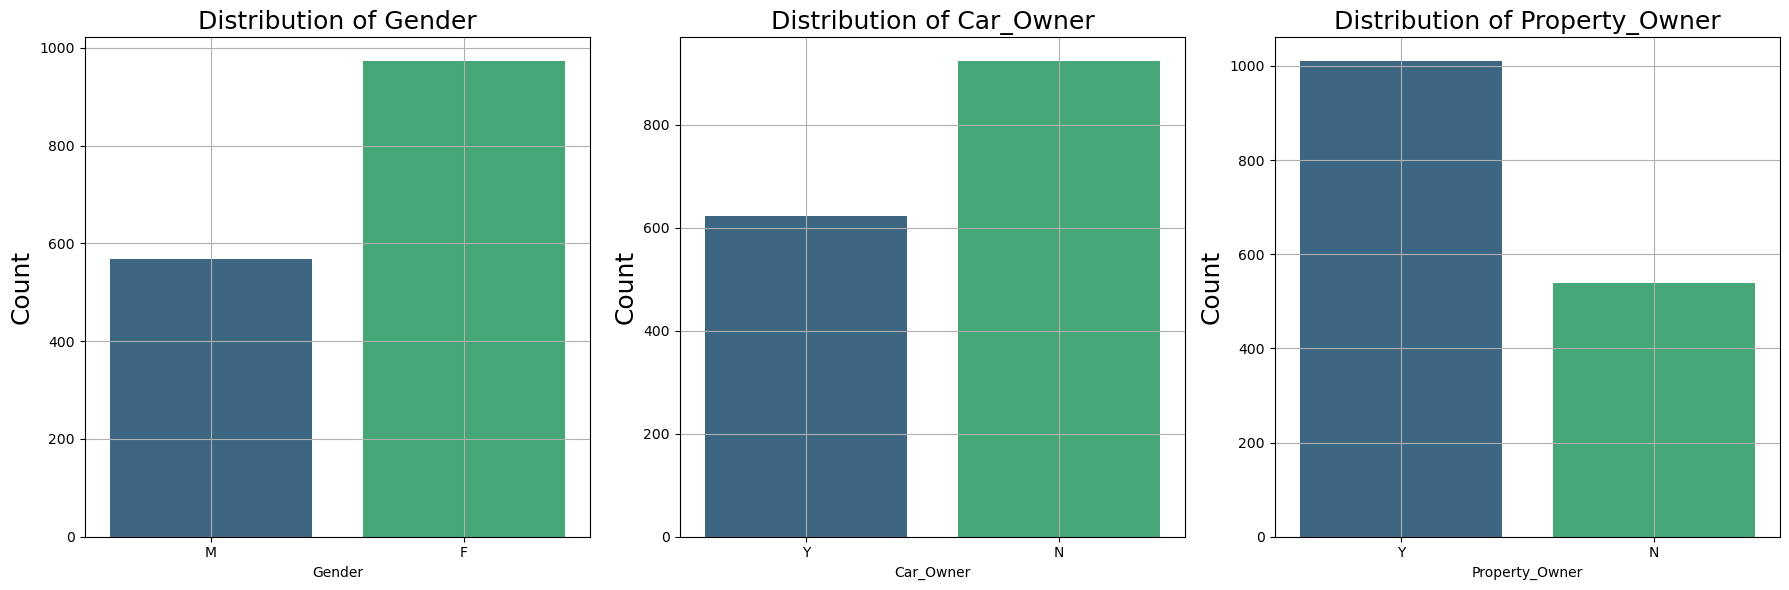

In [15]:
# Specifying the columns

columns = ['Gender', 'Car_Owner', 'Property_Owner']

# Creating the subplots

fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(18, 6))

# Plotting univariate distributions for each column

for i, col in enumerate(columns):
    sns.countplot(data=df , x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

# Adjusting layout to prevent overlapping

plt.tight_layout()

# Showing the plots

plt.show()

1. The dataset displays a higher female representation suggesting that more females are applying for credit cards.
2. Majority of individuals in the dataset do not own a car, which could be attributed to mutiple factors like personal choices or affordability.
3. Most individuals in the dataset are property owners, indicating that property ownership might be a significant factor in credit card approval decisions.

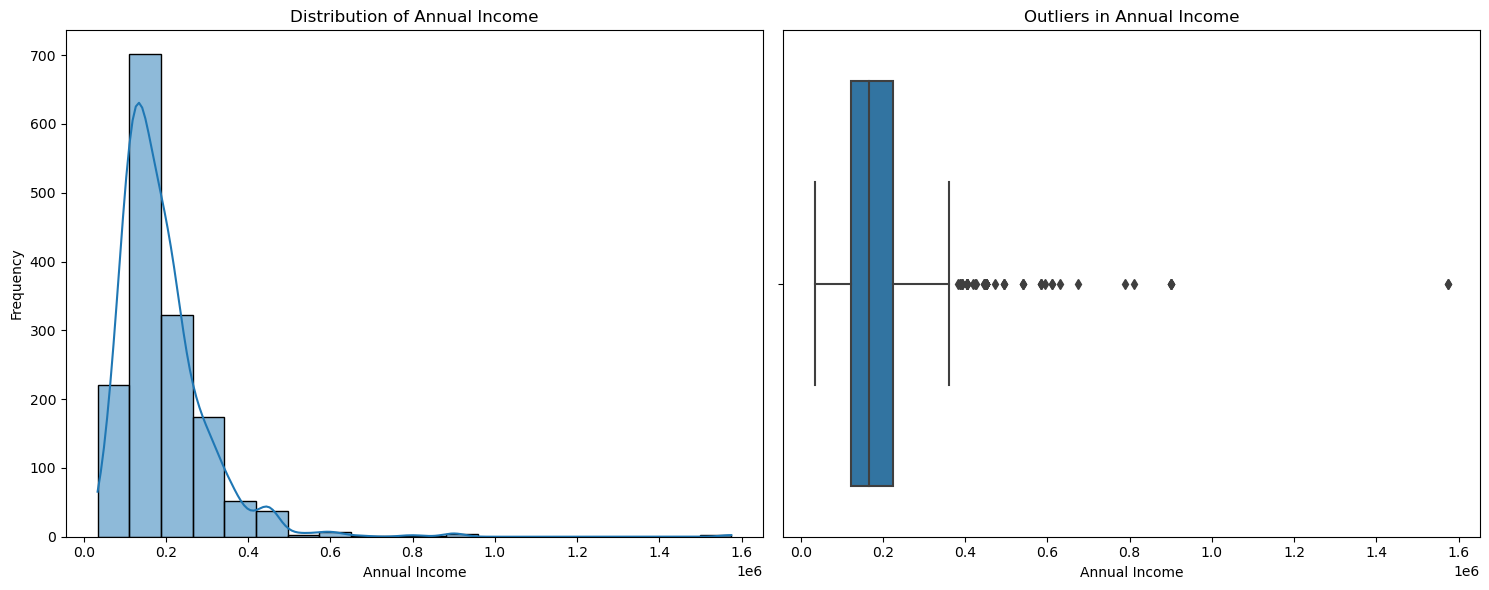

In [16]:
# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE overlay
sns.histplot(df['Annual_Income'], bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Annual Income')

# Box Plot
sns.boxplot(x=df['Annual_Income'], ax=axes[1])
axes[1].set_xlabel('Annual Income')
axes[1].set_title('Outliers in Annual Income')

# Adjusting layout for better spacing
plt.tight_layout()

# Showing the plots
plt.show()

1. The annual income distribution is right-skewed, suggesting that most individuals have lower to medium income, with a few outliers in the higher income bracket.
2. The boxplot shows the few outliers with the higher income.

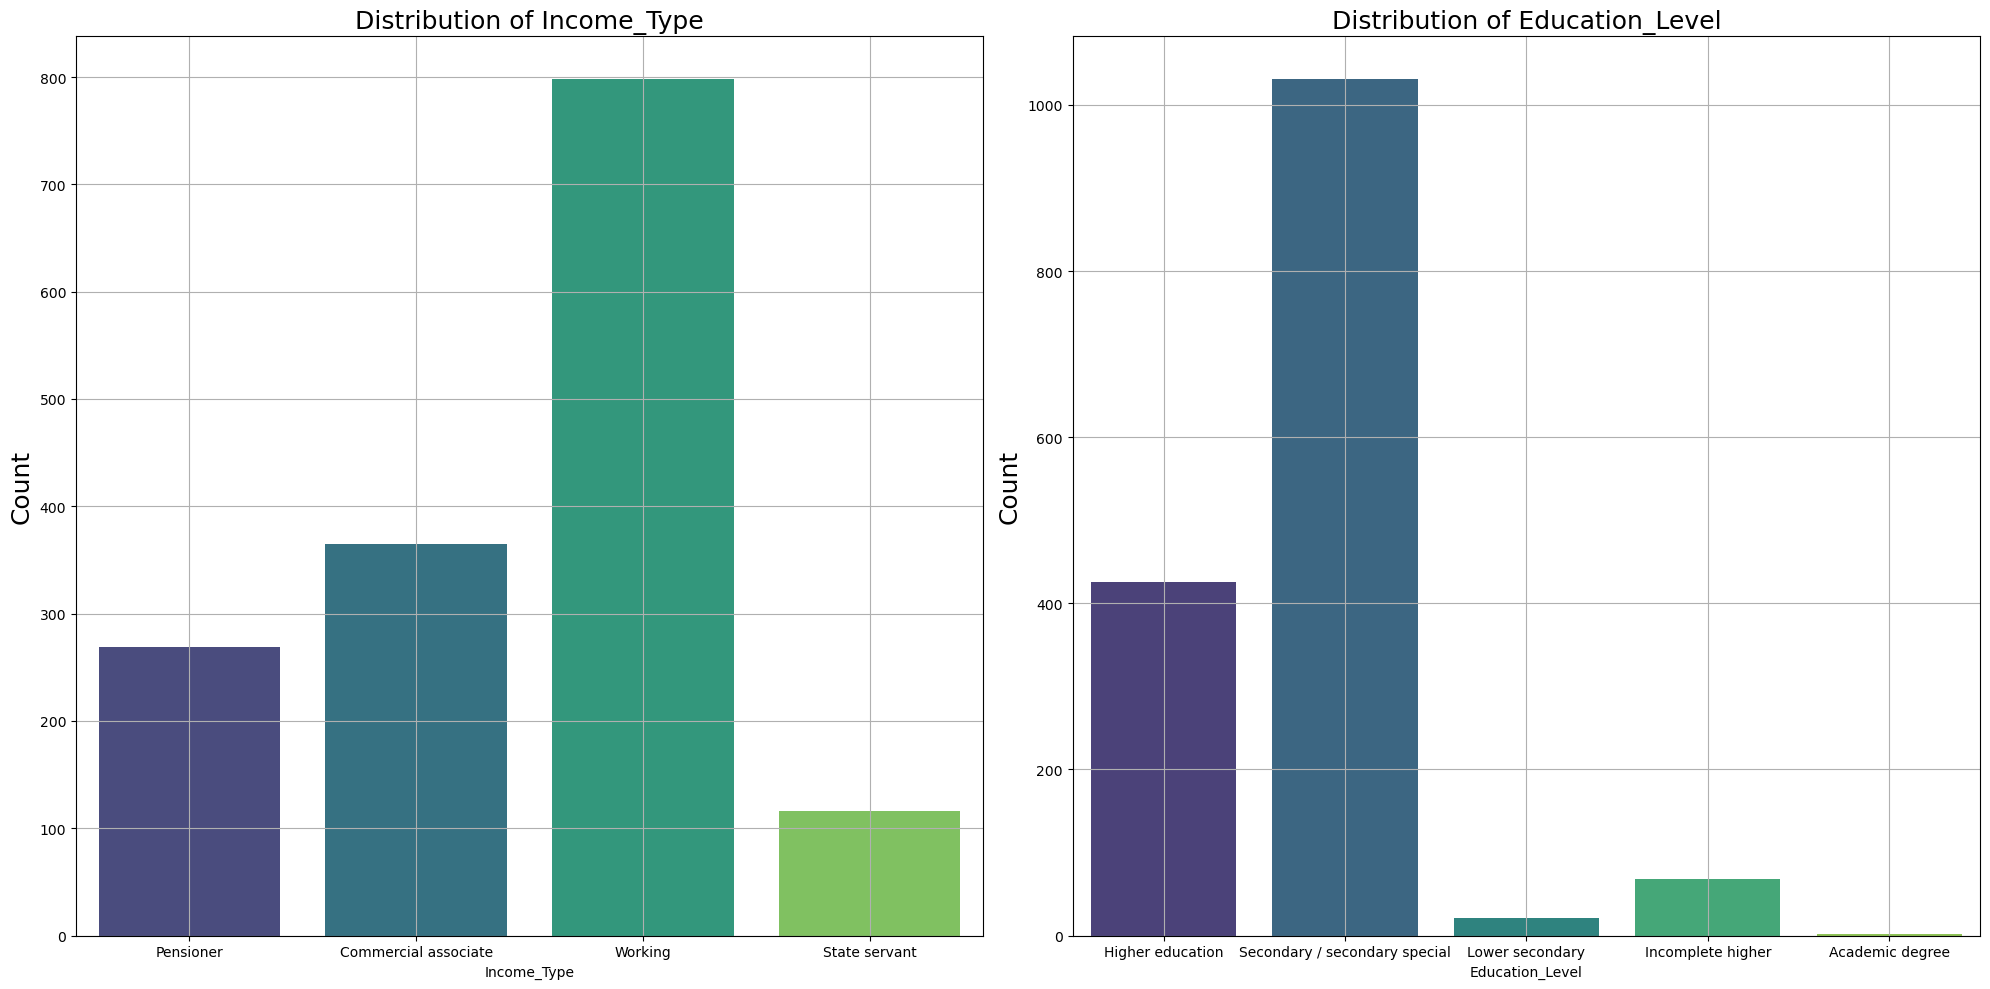

In [17]:
# Specifying columns
columns = ['Income_Type', 'Education_Level']

# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))

# Plotting univariate distributions
for i, col in enumerate(columns):
    sns.countplot(data=df , x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. The highest number of Credit Card application are from peole belonging to the "Working" category, followed by "Commercial associate" and "Pensioner" having the second and third highest representation, with the least number of application from the "State servant" category.
2. Most of the applicants belong to "Secondary / secondary special" education level category which is equal to high school. "Higher education" has the second highest representation, while a few applicants have not completed thier higher education. Some have only qualified "Lower secondary" and only a small fraction of the applicants have an "Academic degree".
3. This also suggests that applicants with advanced academic degrees might be financially stable, have different financial priorities or may be more cautious about taking on additional financial obligations. Additionally, they could have alternative means of financial support or may prefer other forms of payment.

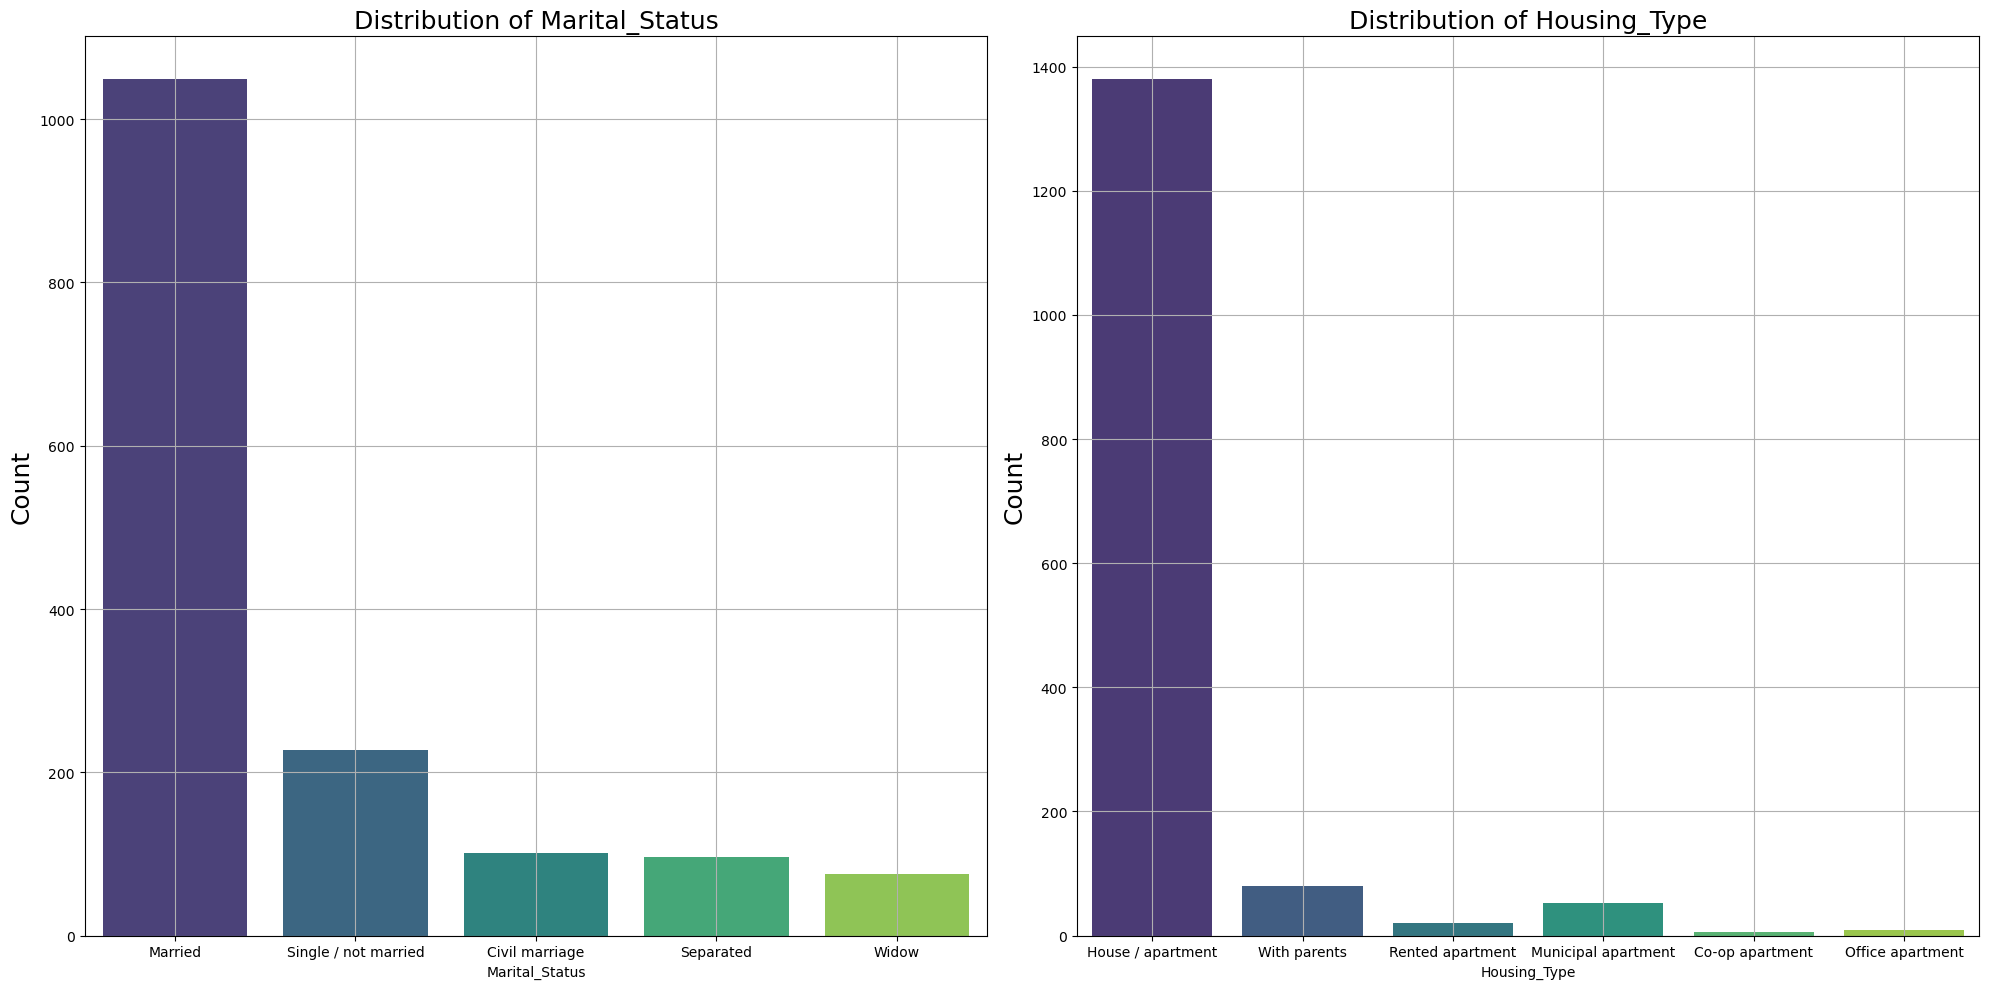

In [18]:
# Specifying columns
columns = ['Marital_Status', 'Housing_Type']

# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))

# Plotting univariate distributions
for i, col in enumerate(columns):
    sns.countplot(data=df , x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. The dataset exhibits that most of the applicants are "Married", while a fraction of the applicants are "Single / not married". Some of the applicants are in "Civil marriage" category,  some in "Separated" and only a small portion of the applicants are in the "Widow" category.
2. In the 'Housing_Type' column, majority of the applicants live in a house or apartment, while some are living with their parents, some in the "Municipal apartment" and a very small portion in a "Rented apartment". The dataset contains very few individuals living in "Office apartment" or "Co-op apartment"

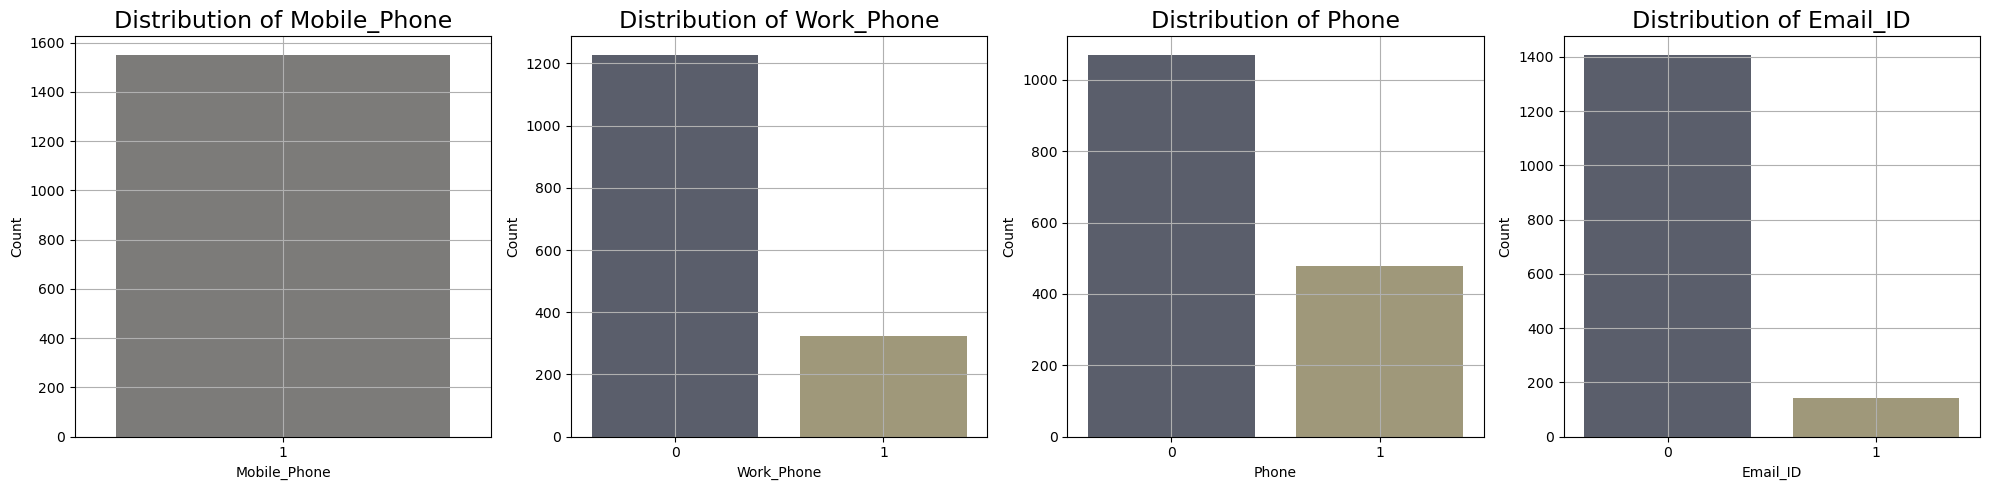

In [19]:
# Specifying columns
columns = ['Mobile_Phone', 'Work_Phone', 'Phone', 'Email_ID']

# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

# Plotting the univariate distributions
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette='cividis')
    axes[i].set_title(f'Distribution of {col}', fontsize = 17)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


1. We can understand from the dataset that all of the applicants have a "Mobile_Phone" suggesting that in today's world it's mandatory to possess a mobile phone for important and immediate communication.
2. A large portion of them have a "Work_Phone" as all of them do not work in offices and businesses.
3. As we can understand from "Mobile_Phone" column that most of them have a means of contact via phone, the "Phone" columns seems reduntand and removing it may not affect the dataset.
4. Most of the applicants have an "Email_ID" suggesting email is an important means of communication between the customer/applicant and the bank and credit card company.

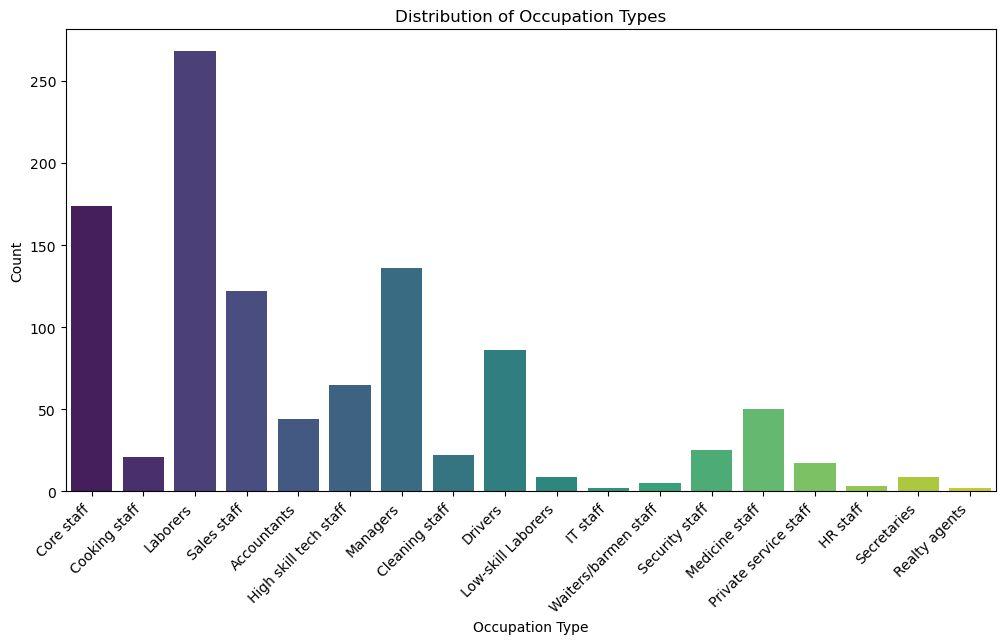

In [20]:
# Plotting the univariate distribution for "Occupation_Type"

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Occupation_Type", palette='viridis')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupation Types')

# Rotating x-axis labels diagonally

plt.xticks(rotation=45, ha='right')
plt.show()

- We can see from the above countplot that the highest number of people who applied for Credit Cards are "Labourers", followed by "Core staff", "Managers", "Sales staff" and "Drivers".
- The presence of "Labourers" among the highest applicants suggests that there is interest in credit cards across various job categories.
- The mix of occupations suggests that credit card applications come from a diverse customer base, including "Labourers" and "Managers" implying that credit card applications include individuals from both lower-income and higher-income brackets.
- Here, since we Know the dominant occupational types among credit card applicants, it provides us opportunity for targeted marketing strategies.
- Also understanding this occupational distribution will help us in assessing the risk associated with different applicant groups. Each occupation may have its own risk profile, influencing creditworthiness assessments and risk management strategies.

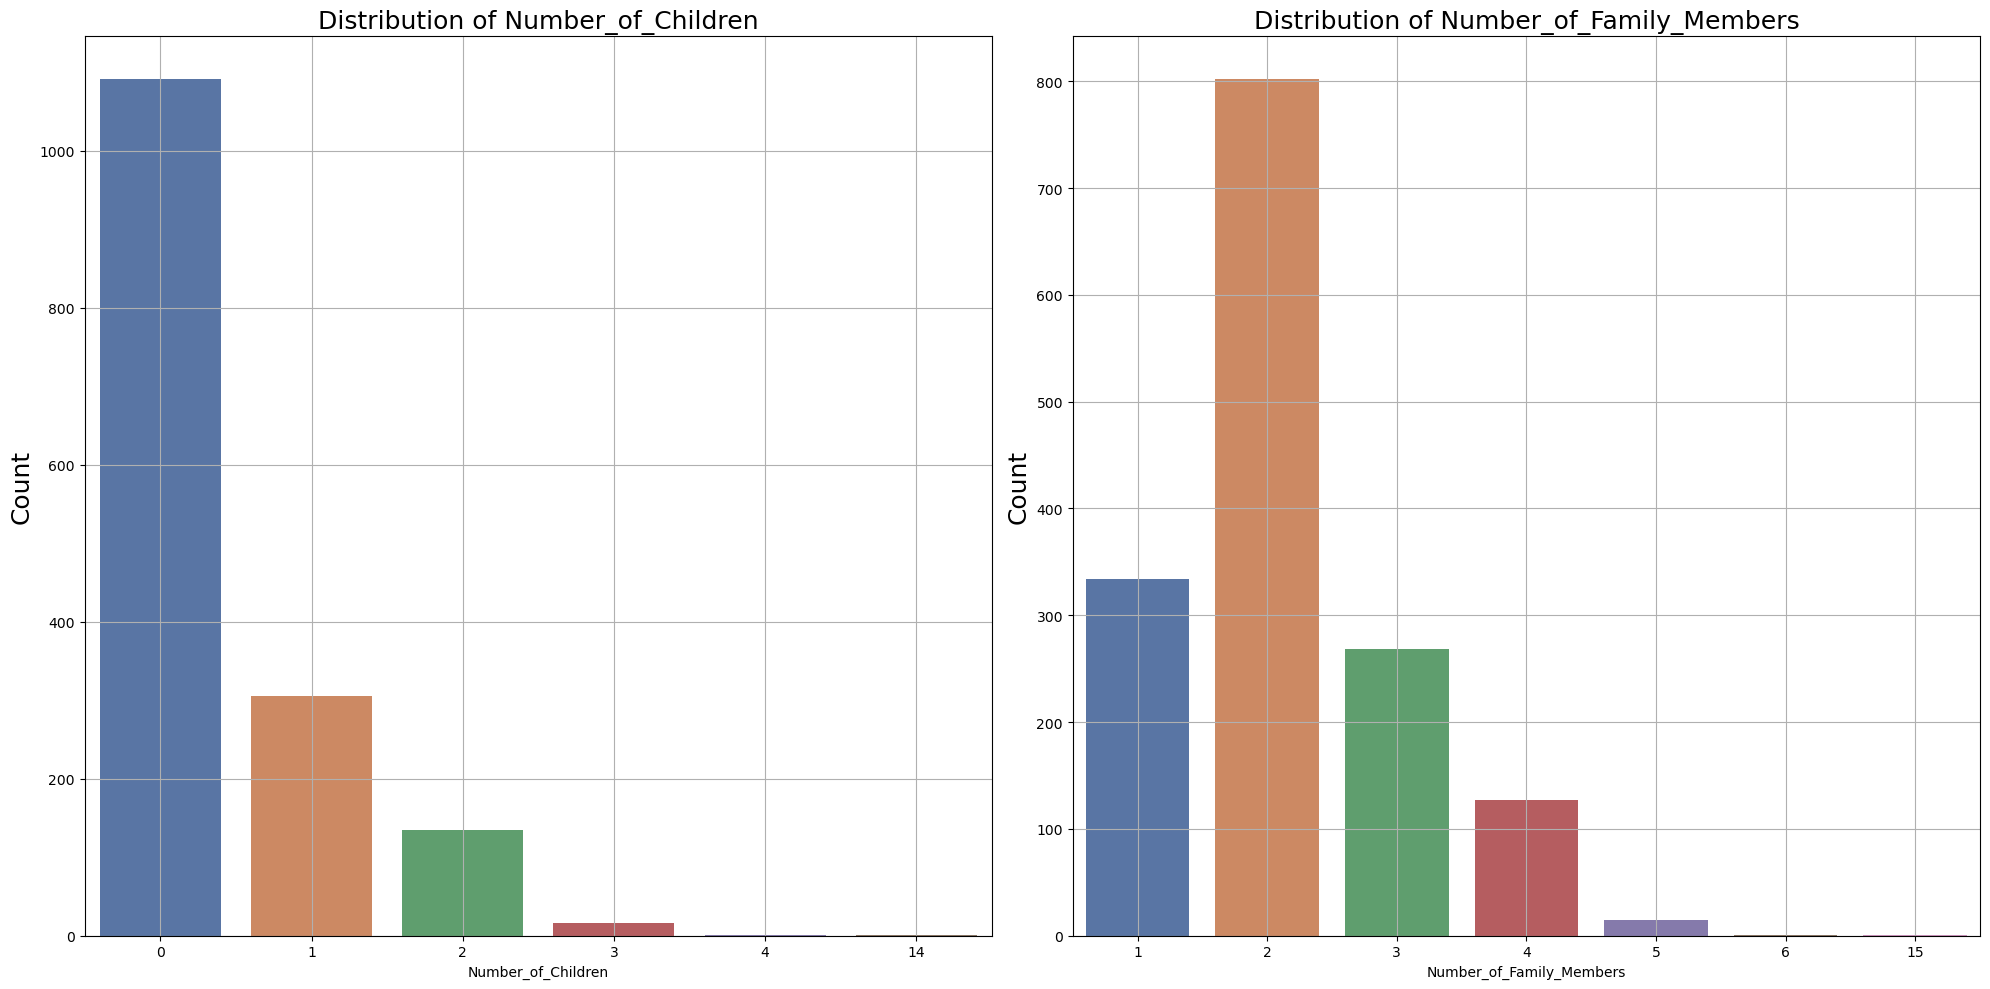

In [21]:
# Specifying columns
columns = ['Number_of_Children', 'Number_of_Family_Members']

# Creating the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))

# Plotting the univariate distributions

for i, col in enumerate(columns):
    sns.countplot(data=df , x=col, ax=axes[i], palette='deep')
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

1. Most individuals in the dataset have zero children while just a portion of them have just one, with very few of them having two or more children.
2. The highest number of applicants have only two family members followed by one, three and four. Only a few have five or more members.
3. We can notice that the number of family members and number of children are in sync as if there are only one or two family members, it exlains why most of them have zero children.

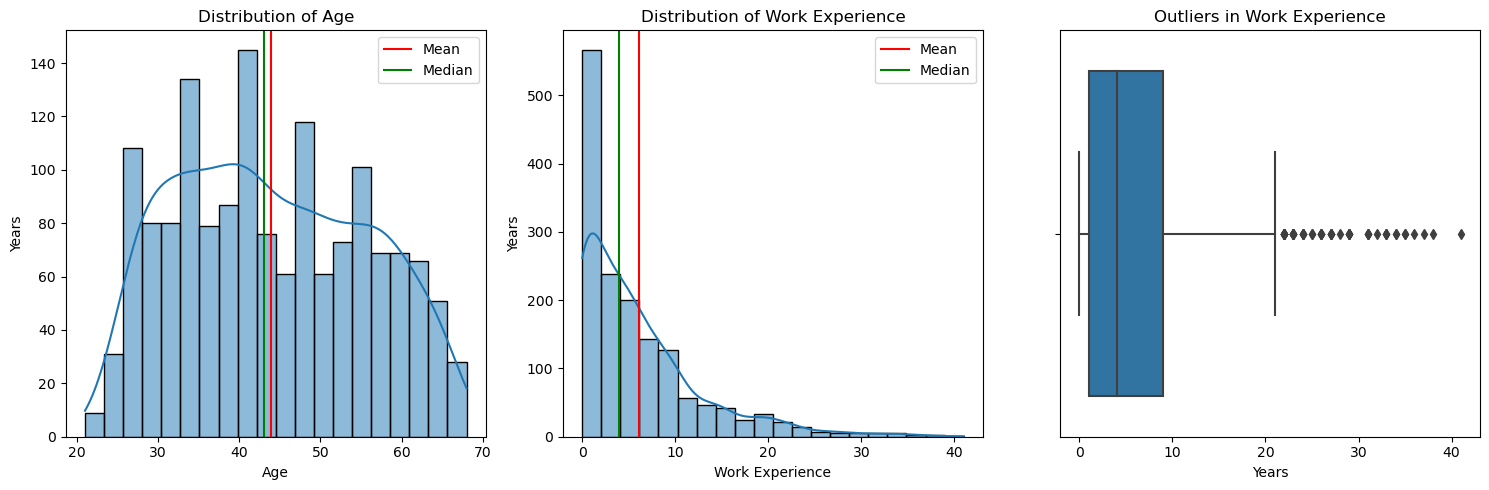

In [22]:
# Creating the subplots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting univariate distributions for Age

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0]) 
axes[0].axvline(x=df['Age'].mean(), color="red", label="Mean")
axes[0].axvline(x=df['Age'].median(), color="green", label="Median")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Years')
axes[0].set_title('Distribution of Age')
axes[0].legend()

# Plotting univariate distributions for Work Experience

sns.histplot(df['Work_Experience'], bins=20, kde=True, ax=axes[1]) 
axes[1].axvline(x=df['Work_Experience'].mean(), color="red", label="Mean")
axes[1].axvline(x=df['Work_Experience'].median(), color="green", label="Median")
axes[1].set_xlabel('Work Experience')
axes[1].set_ylabel('Years')
axes[1].set_title('Distribution of Work Experience')
axes[1].legend()

# Box Plot for Work Experience to view outliers

sns.boxplot(x=df['Work_Experience'], ax=axes[2])
axes[2].set_xlabel('Years')
axes[2].set_title('Outliers in Work Experience')

# Adjusting layout for better spacing

plt.tight_layout()

# Showing the plots

plt.show()


1. Credit card applicants predominantly fall in the 40-50 age group, showing a balanced distribution.
2. A significant portion of applicants is unemployed, with a right-skewed distribution indicating outliers with high work experiences.

##### Target Variable (Label) :
- 0 is application approved and 1 is application rejected.

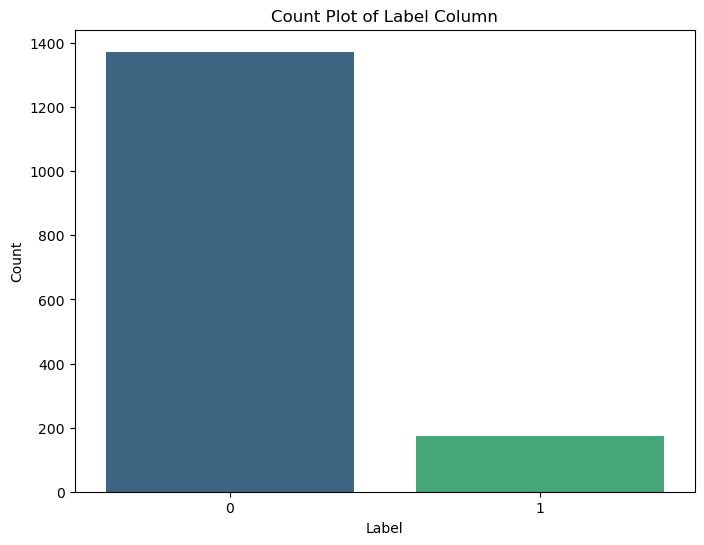

In [23]:
# Count plot for 'Label' to visualize the distribution of classes

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count Plot of Label Column')
plt.show()

- **Class Imbalance:**
   - The count plot suggests a class imbalance in the 'Label' variable, with Class 0 (application approved) having a significantly larger number of instances than Class 1 (application rejected).

- **Imbalanced Learning Task:**
   - When training a machine learning model on this imbalanced data, it may be challenging for the model to accurately predict the minority class (Class 1) due to the dominance of the majority class (Class 0).

- We would need to explore techniques like oversampling, undersampling, or algorithmic approaches designed to handle imbalanced datasets to enhance the model's performance, particularly in predicting the minority class.

**Anuual Income Vs Other Features**

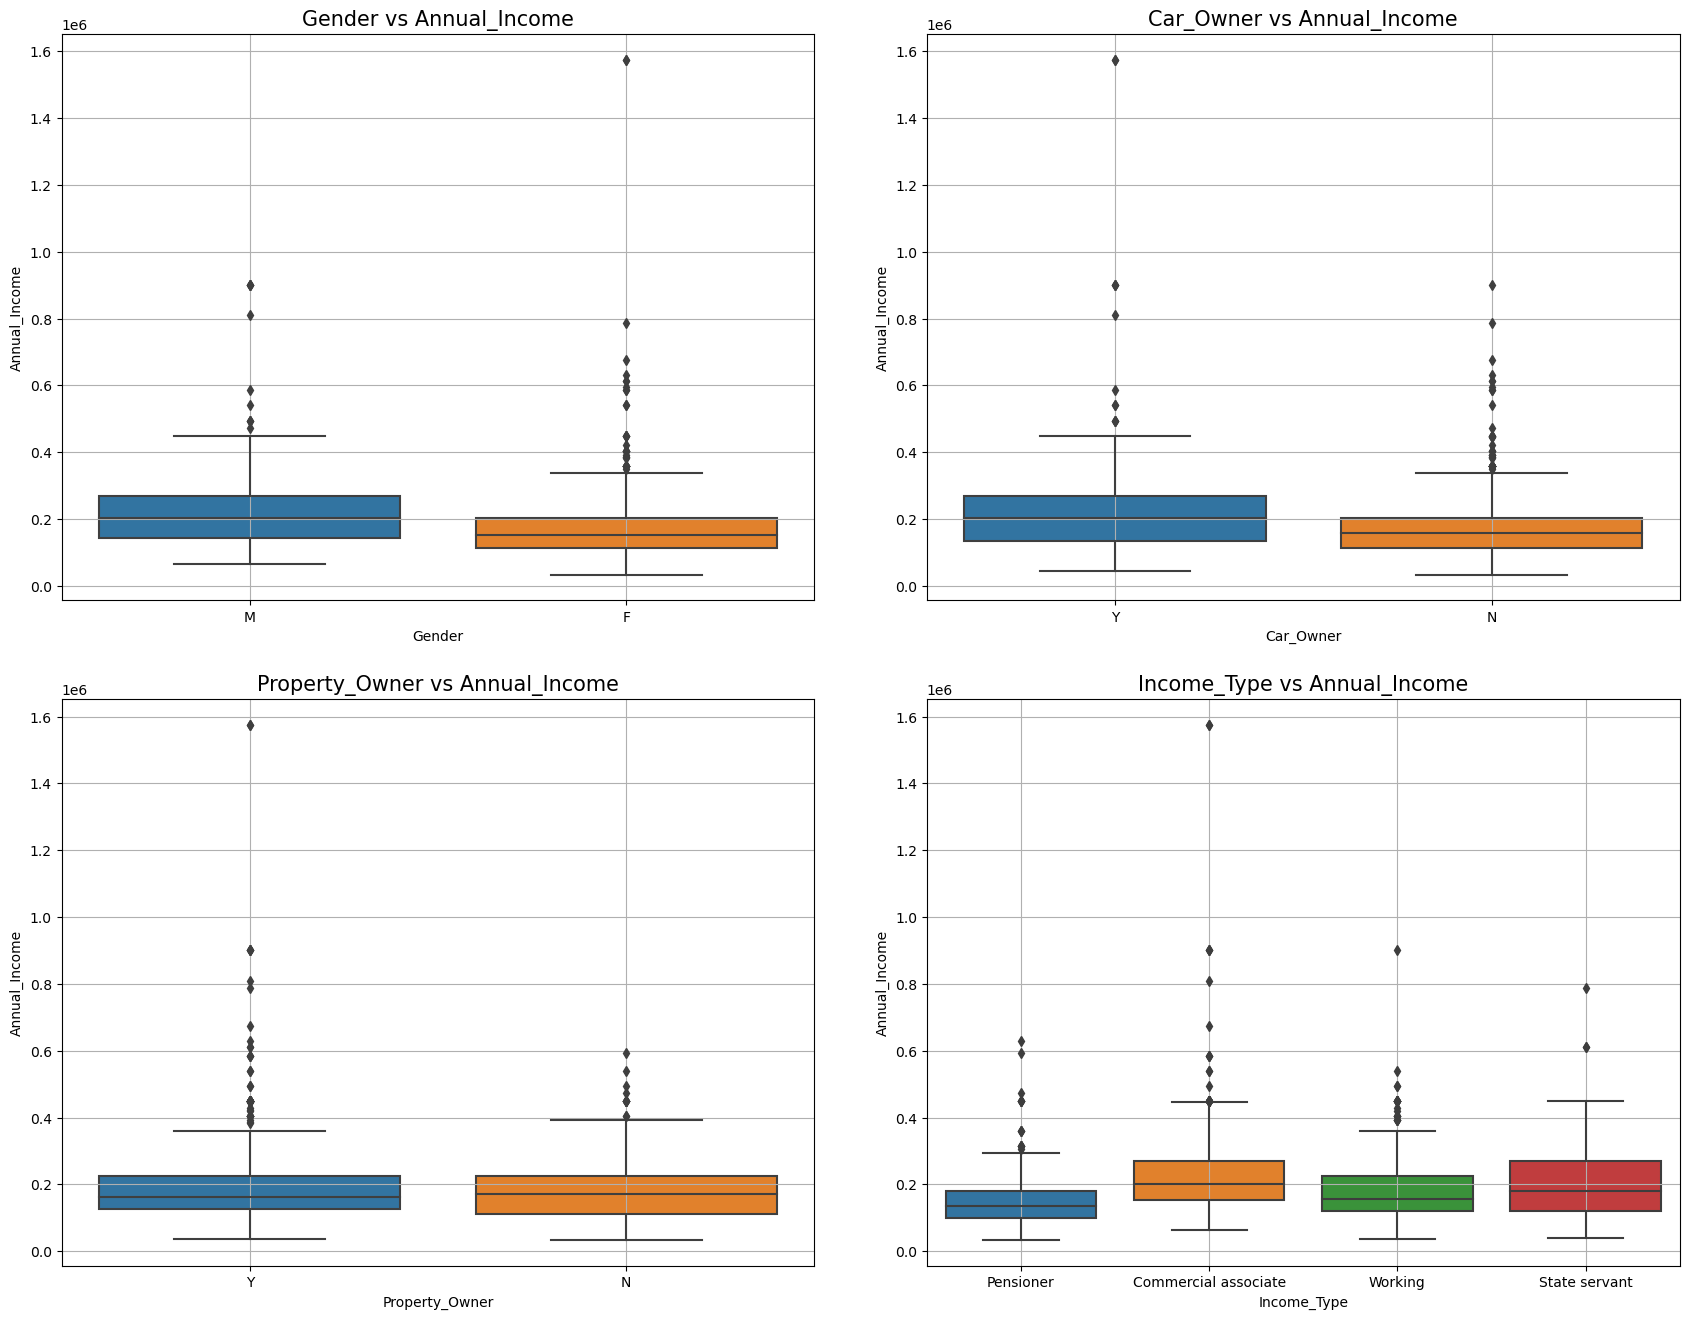

In [24]:
# Specifying columns

cols = ['Gender', 'Car_Owner', 'Property_Owner', 'Income_Type']

# Creating subplots

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.tight_layout(pad=5)

# Looping through each categorical feature and creating a boxplot

for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Annual_Income', ax=ax)
        ax.set_title(cols[i] + ' vs Annual_Income', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()

- Despite a higher number of female applicants, males generally have a greater income.
- Higher-income applicants are more likely to own cars. The ownership of property doesn't significantly influence the average income.

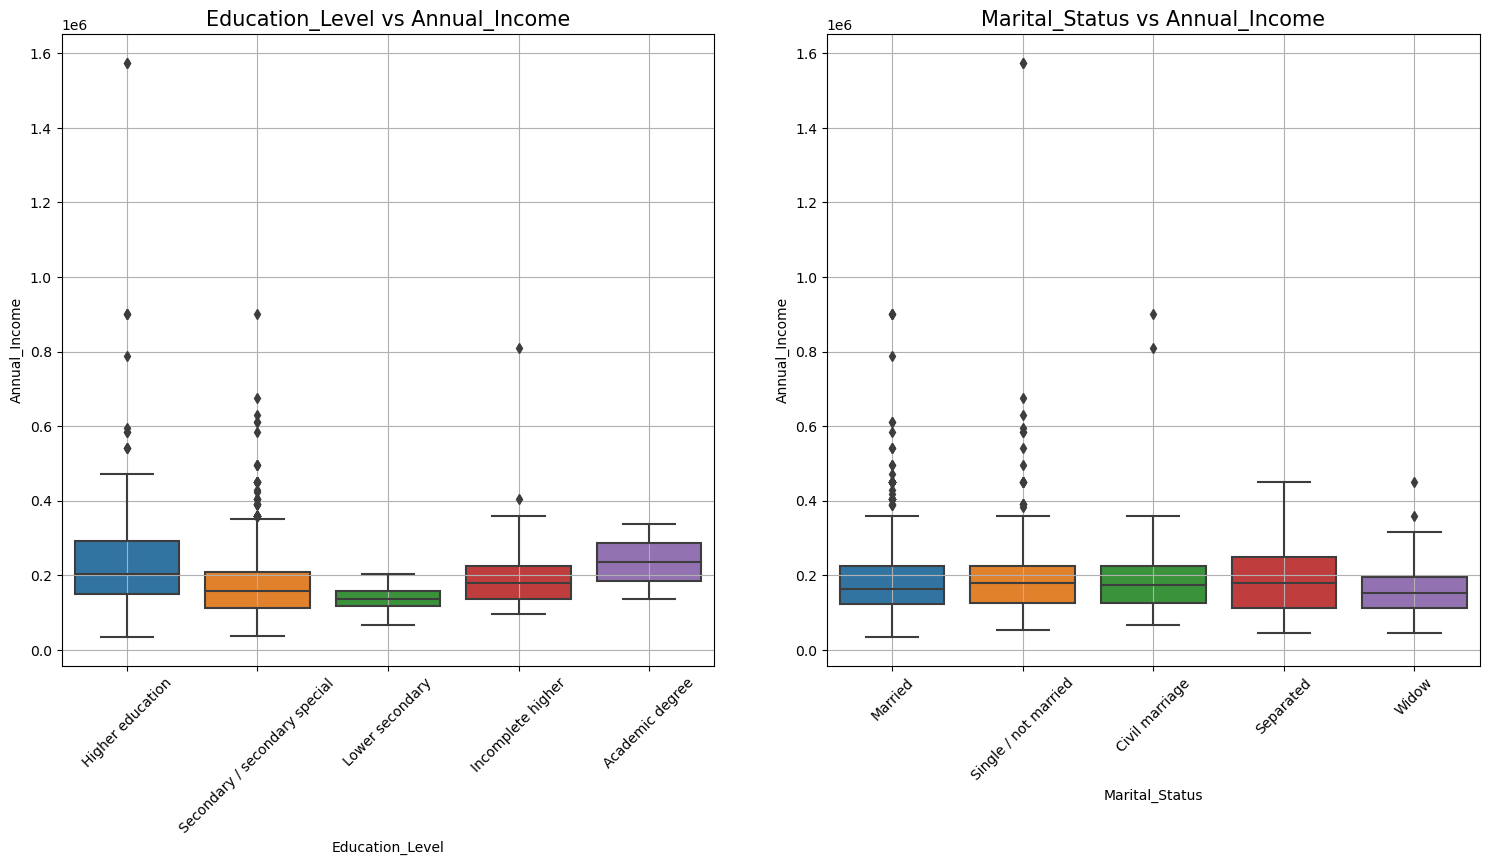

In [25]:
# Specifying columns

cols = ['Education_Level', 'Marital_Status']

# Increasing the figsize for better visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout(pad=5)

# Looping through each categorical feature and creating a boxplot

for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Annual_Income', ax=ax)
        ax.set_title(cols[i] + ' vs Annual_Income', fontsize=15)
        ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels
        ax.grid(True)

plt.show()

- Those with an academic degree tend to have the highest average annual incomes.
- Those who are separated have a higher median annual income comapared to rest but does not exhibit noticeable difference.

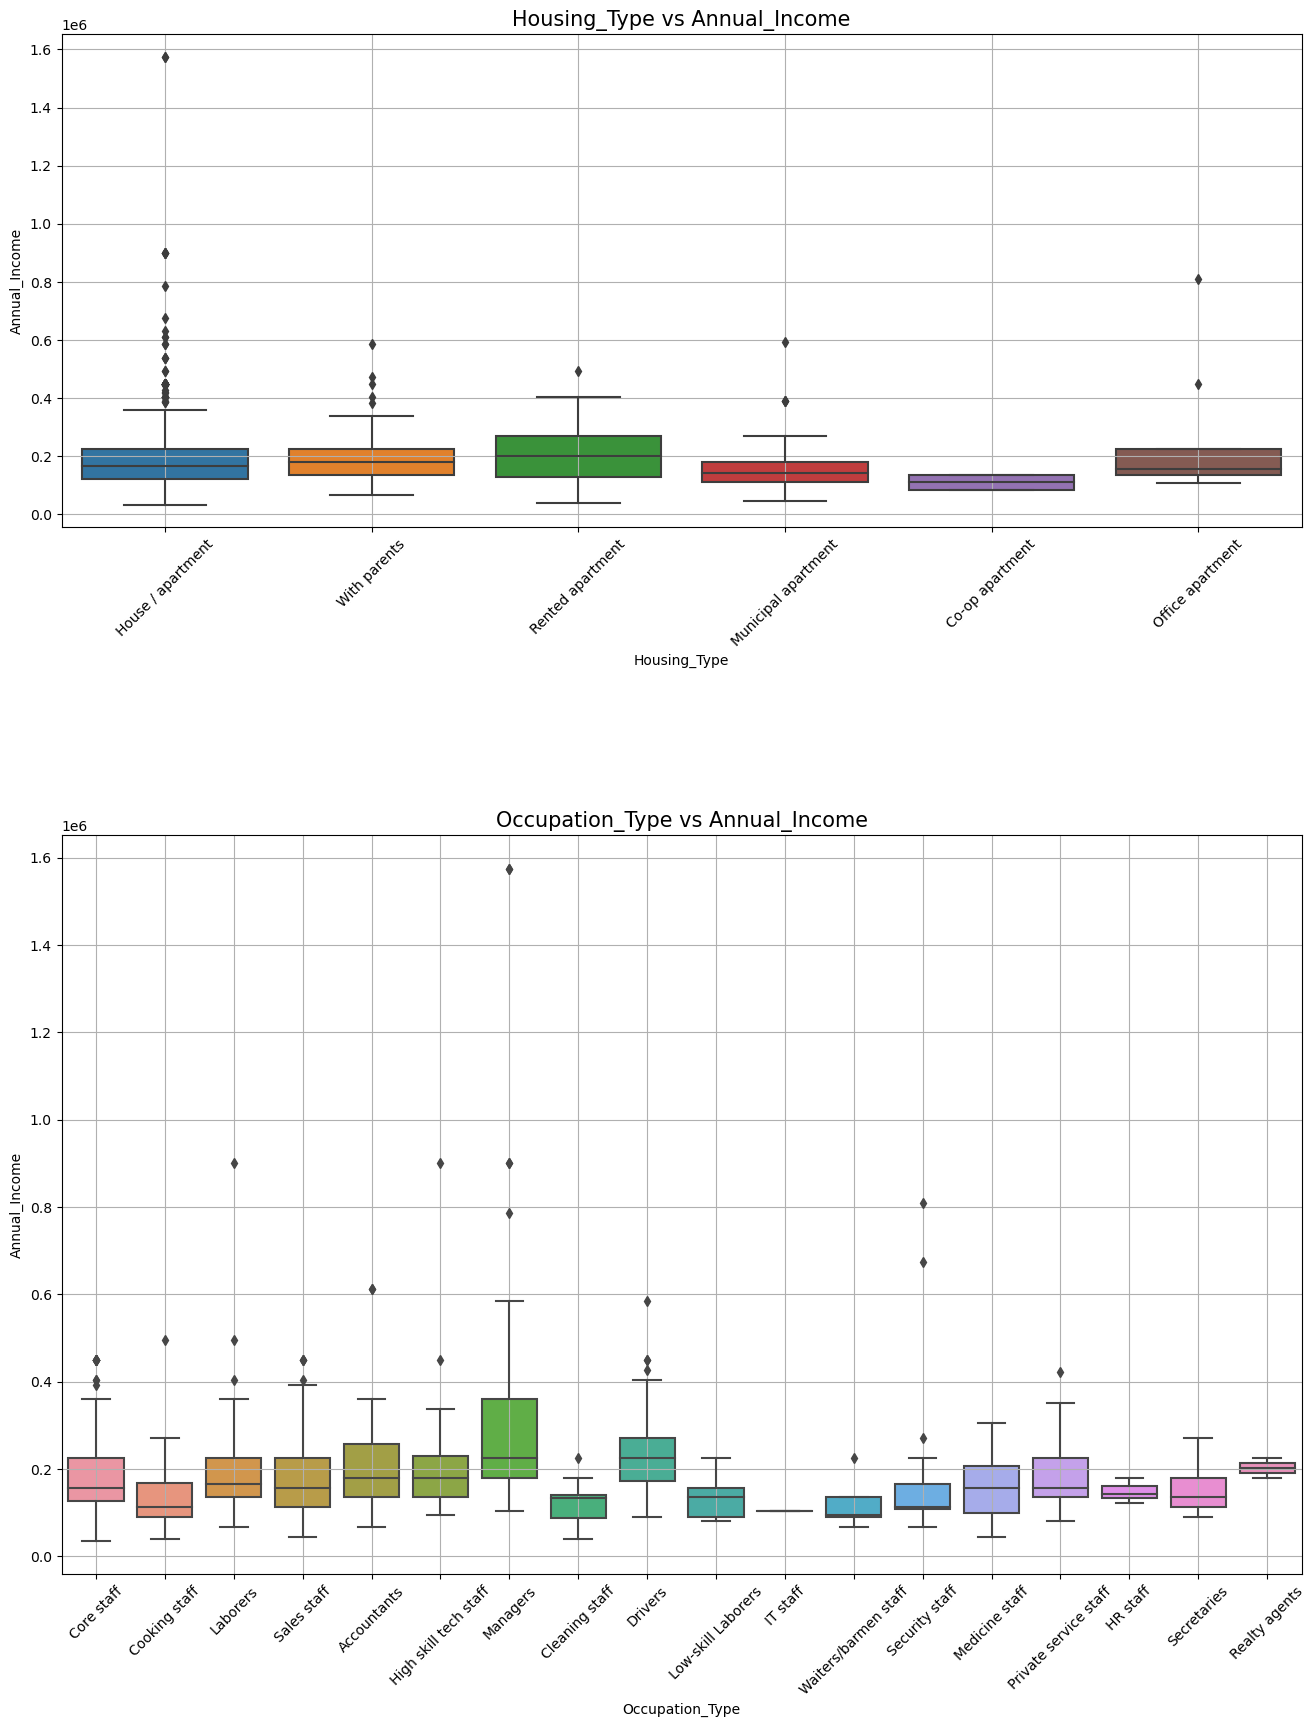

In [26]:
import matplotlib.gridspec as gridspec

# Specifying the columns
cols = ['Housing_Type', 'Occupation_Type']

# creating a grid of subplots
fig = plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.5], hspace=0.5)

# Looping through each categorical feature and creating a boxplot
for i, col in enumerate(cols):
    ax = plt.subplot(gs[i])
    sns.boxplot(data=df, x=col, y='Annual_Income', ax=ax)
    ax.set_title(f'{col} vs Annual_Income', fontsize=15)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.show()

- On an average, managers and drivers earn more compared to other occupations.
- Applicants with a higher median annual income often reside in rented apartments.

**Work Experience vs remaning features**

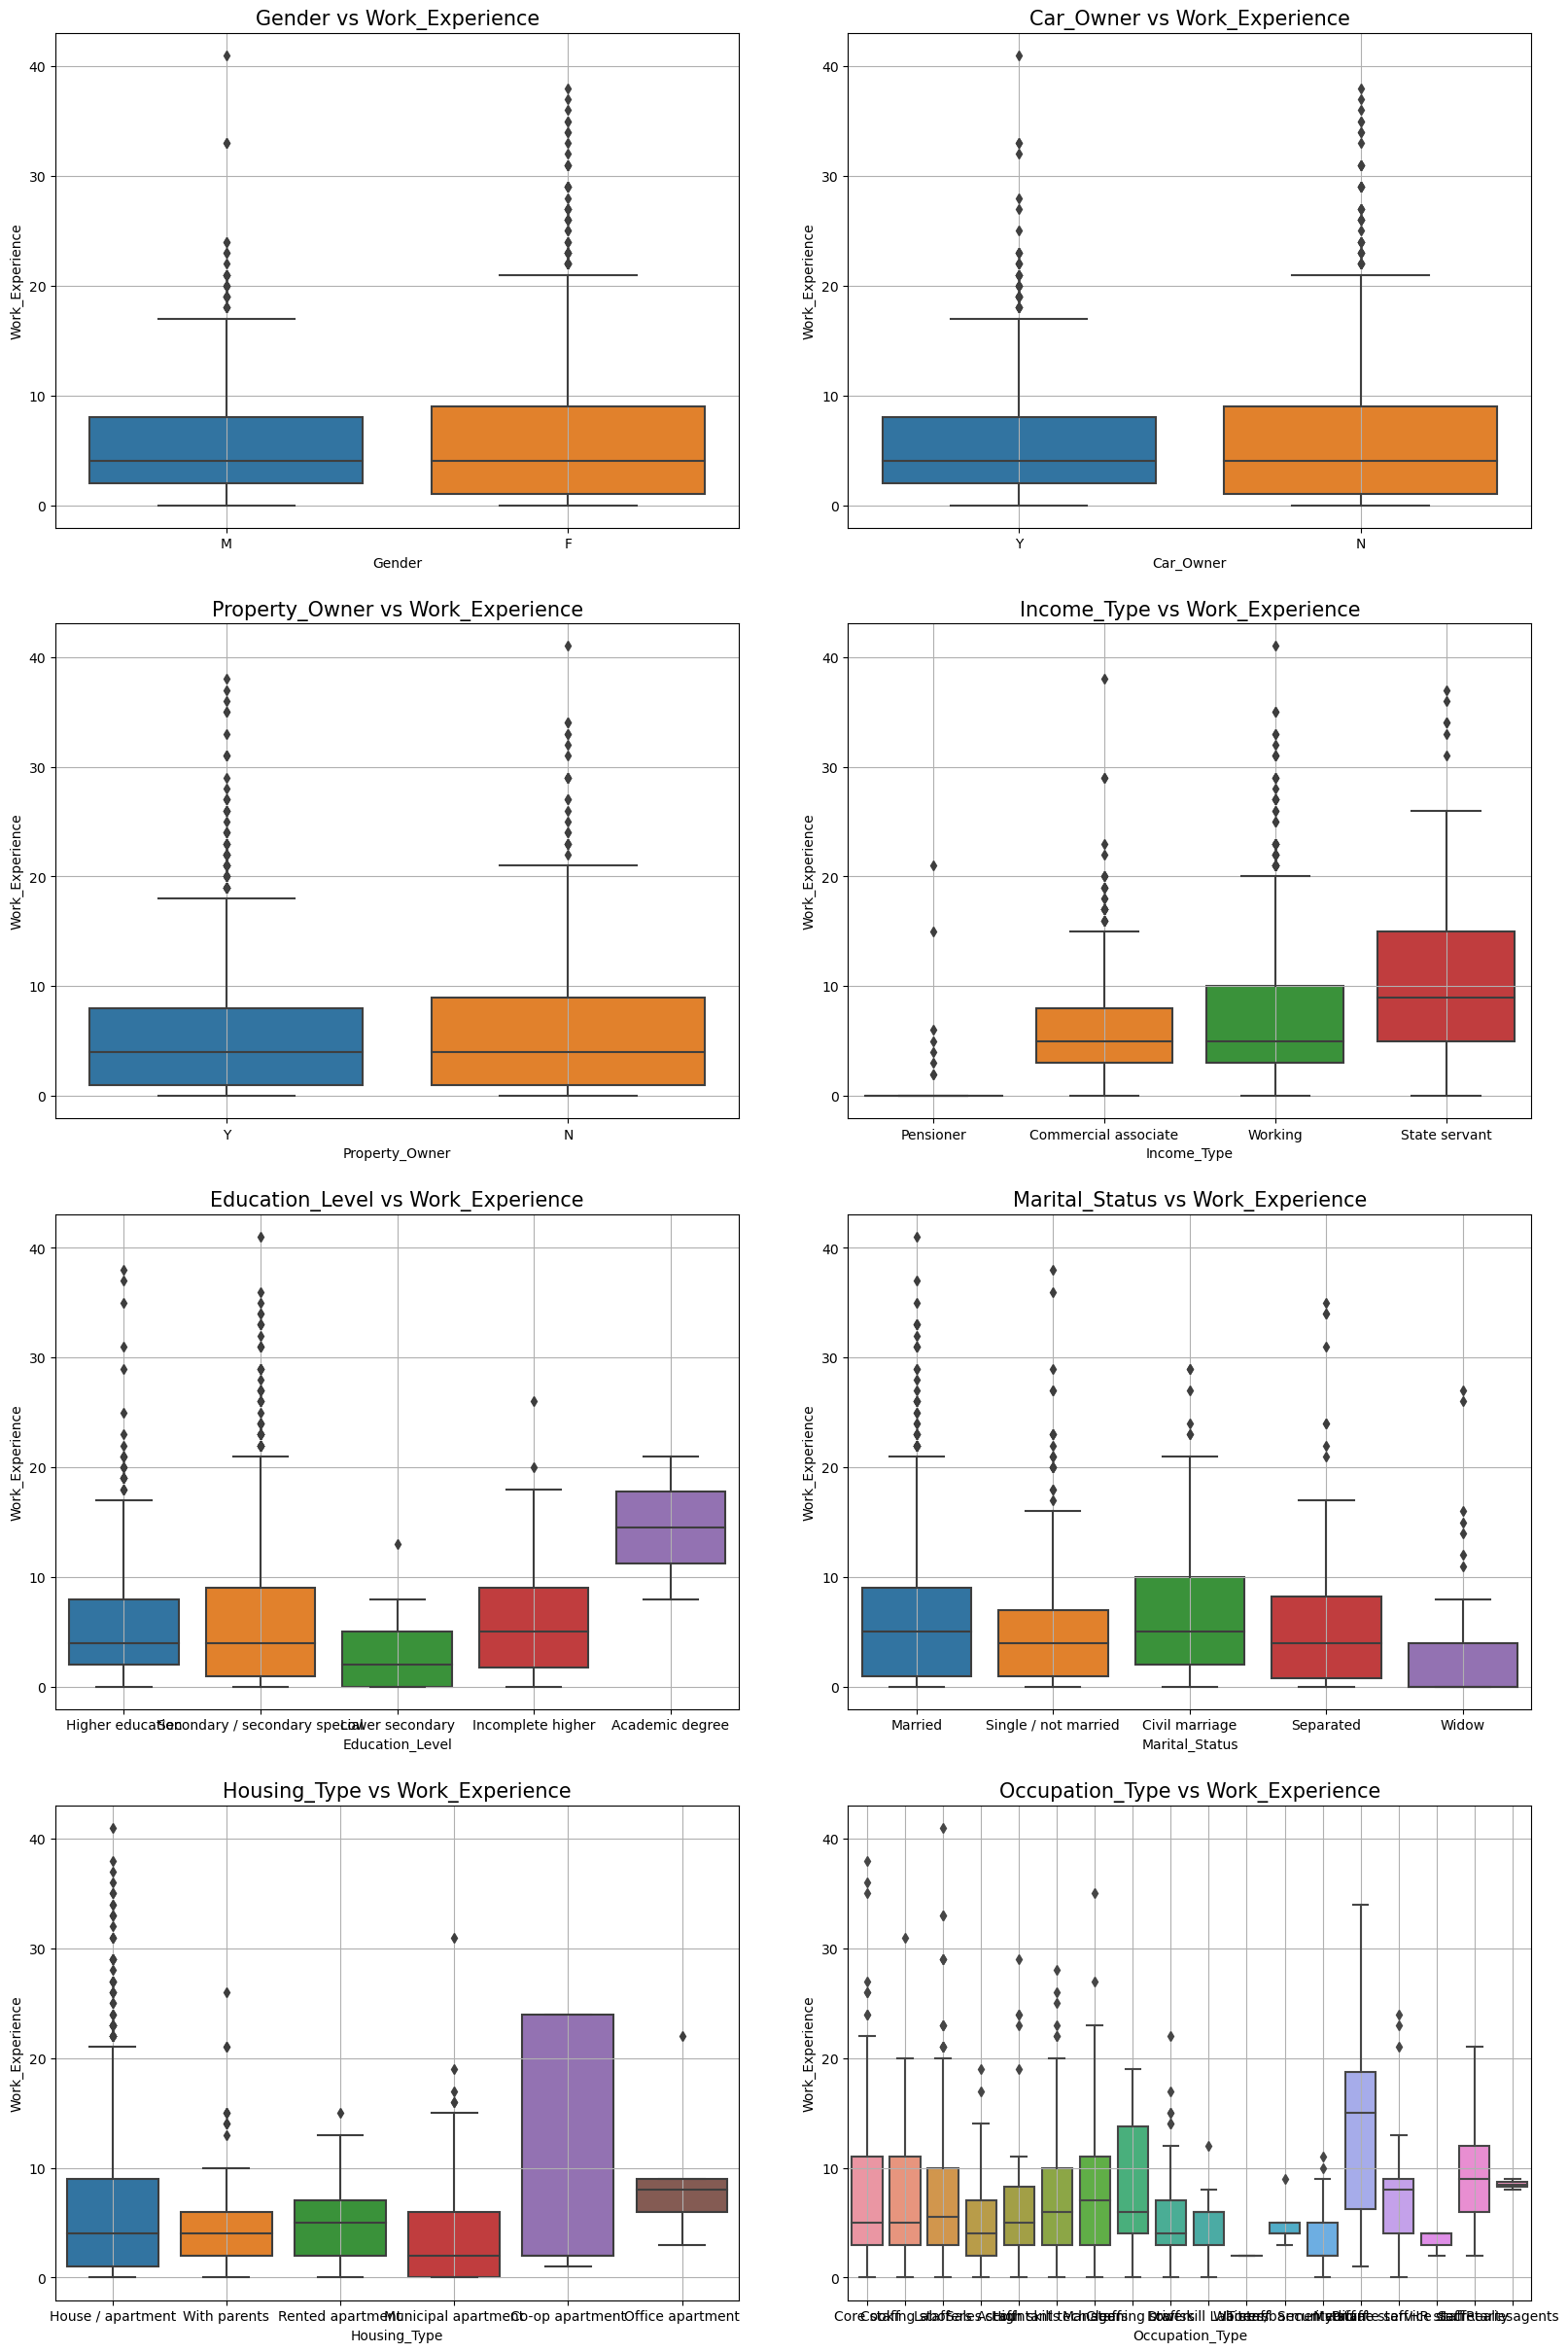

In [27]:
cols = ['Gender', 'Car_Owner', 'Property_Owner', 'Income_Type', 'Education_Level', 'Marital_Status', 'Housing_Type', 'Occupation_Type']

fig, axes = plt.subplots(4, 2, figsize=(17, 25))
fig.tight_layout(pad=5)

# Looping through each categorical feature and creating a boxplot
for i, ax in enumerate(axes.ravel()):
    if i < len(cols):
        sns.boxplot(data=df, x=cols[i], y='Work_Experience', ax=ax)
        ax.set_title(cols[i] + ' vs Work_Experience', fontsize = 15)
        ax.tick_params(axis='x')
        ax.grid(True)

plt.show()

- Both male and female applicants have comparable levels of experience.
- State servants and medicine staff tend to have higher work experience compared to other professions.
- Those with an academic degree usually possess more work experience.
- On an average, those who have higher work experience tend to live in office apartments.

In [28]:
# Checking correlation

features=['Annual_Income','Number_of_Children','Number_of_Family_Members','Age', 'Work_Experience']

df[features].corr()


,Annual_Income,Number_of_Children,Number_of_Family_Members,Age,Work_Experience
Annual_Income,1.000000,0.078497,0.050957,-0.111294,0.051672
Number_of_Children,0.078497,1.000000,0.890248,-0.278516,0.073313
Number_of_Family_Members,0.050957,0.890248,1.000000,-0.265000,0.092535
Age,-0.111294,-0.278516,-0.265000,1.000000,-0.022755
Work_Experience,0.051672,0.073313,0.092535,-0.022755,1.000000


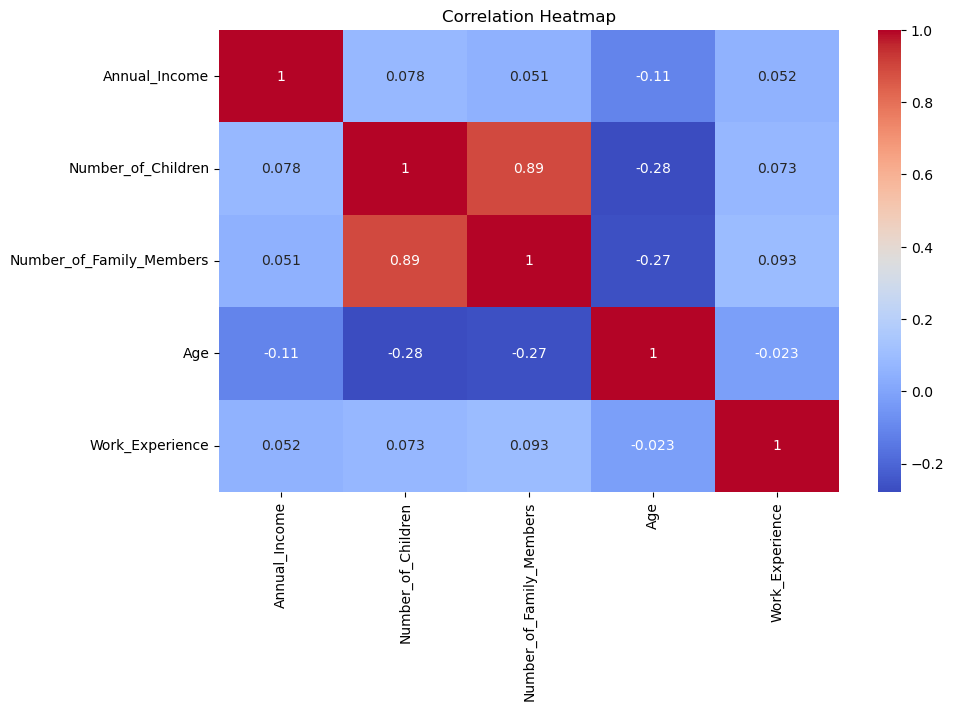

In [29]:
# Plotting correlation on a heatmap

plt.figure(figsize = (10,6))
sns.heatmap(df[features].corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Children and Family members have linear corelation, that means more no of children results in more members in the family,so we can safely remove one of the two features.

### Handling Missing Values & Outliers

In [30]:
# checking columns with null values

df.isnull().sum()

Individual_ID                 0
Gender                        7
Car_Owner                     0
Property_Owner                0
Number_of_Children            0
Annual_Income                23
Income_Type                   0
Education_Level               0
Marital_Status                0
Housing_Type                  0
Mobile_Phone                  0
Work_Phone                    0
Phone                         0
Email_ID                      0
Occupation_Type             488
Number_of_Family_Members      0
Label                         0
Age                          22
Work_Experience               0
dtype: int64

In [31]:
# checking shape

df.shape

(1548, 19)

In [32]:
# Handling missing values for categorical columns

df["Gender"].fillna(method='ffill', inplace=True)
df.drop(columns = ['Occupation_Type'] , inplace = True)
df.isnull().sum()

Individual_ID                0
Gender                       0
Car_Owner                    0
Property_Owner               0
Number_of_Children           0
Annual_Income               23
Income_Type                  0
Education_Level              0
Marital_Status               0
Housing_Type                 0
Mobile_Phone                 0
Work_Phone                   0
Phone                        0
Email_ID                     0
Number_of_Family_Members     0
Label                        0
Age                         22
Work_Experience              0
dtype: int64

In [33]:
# Handling missing values for numerical columns

mean_income_bytype = df.groupby(['Income_Type'])['Annual_Income'].mean()

# Imputing income based on income type

for income_type, mean_income in mean_income_bytype.items():
    df.loc[(df['Income_Type'] == income_type) & (df['Annual_Income'].isna()), 'Annual_Income'] = mean_income

df["Annual_Income"].isnull().sum()


0

In [34]:
mean_age_byincome = df.groupby(['Income_Type'])['Age'].mean()

# Imputing age based on income type

for income_type, mean_age in mean_age_byincome.items():
    df.loc[(df['Income_Type'] == income_type) & (df['Age'].isna()), 'Age'] = mean_age

df["Age"].isnull().sum()


0

**Treating Outliers**

In [35]:
# Selecting features for outlier treatment

df.select_dtypes(include=['int', 'float'])


,Individual_ID,Number_of_Children,Annual_Income,Mobile_Phone,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,5008827,0,180000.0,1,0,0,0,2,1,51.000000,0.0
1,5009744,0,315000.0,1,1,1,0,2,1,37.000000,2.0
2,5009746,0,315000.0,1,1,1,0,2,1,40.226519,2.0
3,5009749,0,234600.0,1,1,1,0,2,1,37.000000,2.0
4,5009752,0,315000.0,1,1,1,0,2,1,37.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,234600.0,1,0,0,0,2,0,33.000000,6.0
1544,5023655,0,225000.0,1,0,0,0,1,0,28.000000,3.0
1545,5115992,2,180000.0,1,0,0,0,4,0,36.000000,7.0
1546,5118219,0,270000.0,1,1,1,0,2,0,42.000000,2.0


In [36]:
df.select_dtypes(include=['int', 'float']).columns

Index(['Individual_ID', 'Number_of_Children', 'Annual_Income', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_ID', 'Number_of_Family_Members', 'Label',
       'Age', 'Work_Experience'],
      dtype='object')

In [37]:
# Checking unique values in below columns to decide outlier treatment

df[['Number_of_Children', 'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_ID', 'Number_of_Family_Members',
    'Label']].apply(lambda x: x.unique())


Number_of_Children             [0, 1, 2, 4, 3, 14]
Mobile_Phone                                   [1]
Work_Phone                                  [0, 1]
Phone                                       [0, 1]
Email_ID                                    [0, 1]
Number_of_Family_Members    [2, 3, 1, 4, 6, 5, 15]
Label                                       [1, 0]
dtype: object

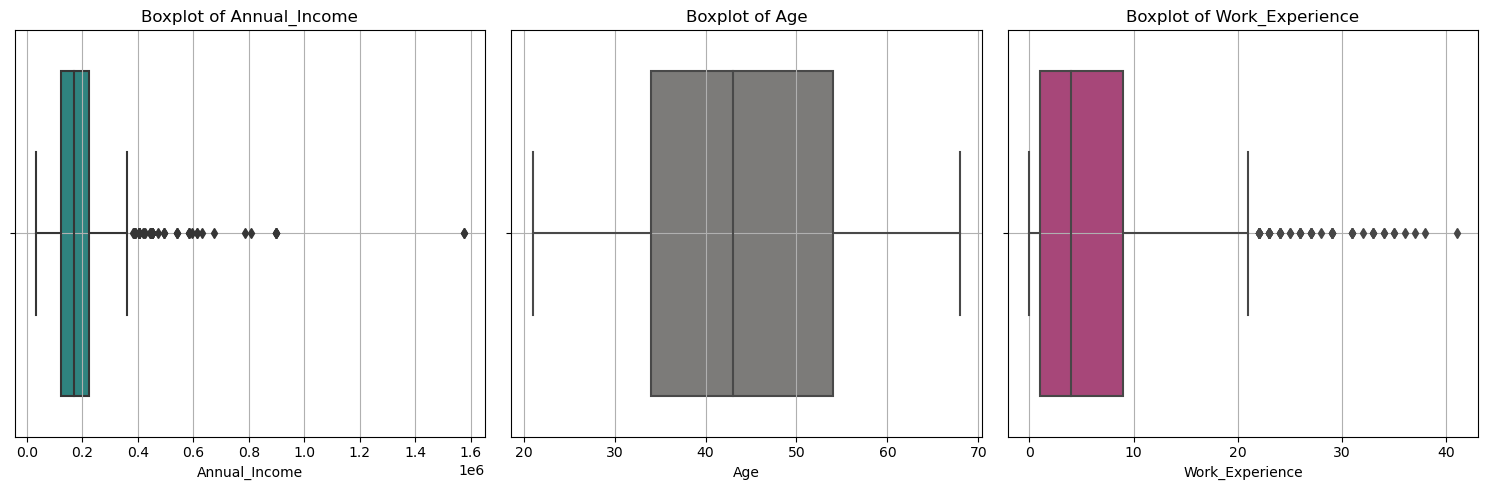

In [38]:
# Checking outliers for treatment

columns_and_colors = [('Annual_Income', 'viridis'), ('Age', 'cividis'), ('Work_Experience', 'magma')]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (col, color) in enumerate(columns_and_colors):
    sns.boxplot(x=df[col], ax=axes[i], palette=color)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


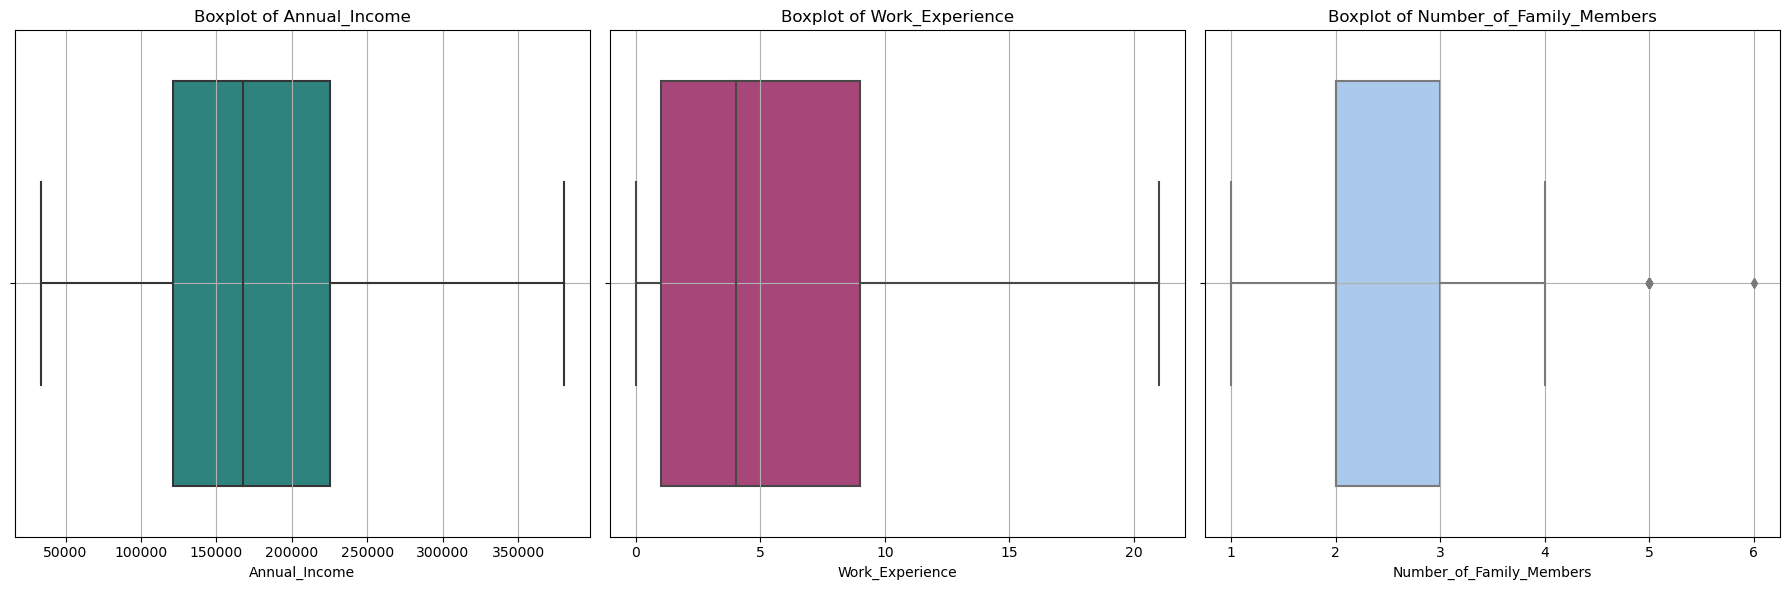

In [39]:
# Outlier treatment "Annual_Income" and "Work_Experience" Columns

q1 = df['Annual_Income'].quantile(0.25)
q3 = df['Annual_Income'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
df['Annual_Income'] = np.where(df['Annual_Income']>upper_limit, upper_limit, df['Annual_Income'])
df['Annual_Income'] = np.where(df['Annual_Income']<lower_limit, lower_limit, df['Annual_Income'])

q1 = df['Work_Experience'].quantile(0.25)
q3 = df['Work_Experience'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
df['Work_Experience'] = np.where(df['Work_Experience']>upper_limit, upper_limit, df['Work_Experience'])
df['Work_Experience'] = np.where(df['Work_Experience']<lower_limit, lower_limit, df['Work_Experience'])

# removing that one exterme value from "Number_of_Family_Members" column
df = df[df['Number_of_Family_Members'] < 14]


# Checking boxplot for outliers after treatment

columns_and_colors = [('Annual_Income', 'viridis'), ('Work_Experience', 'magma'), ('Number_of_Family_Members', 'pastel')]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (col, color) in enumerate(columns_and_colors):
    sns.boxplot(x=df[col], ax=axes[i], palette=color)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [40]:
# Expoting cleaned data

df.to_csv('cleaned_data.csv')
cleaned_data = df.copy()

1. Dropping "Number_of_Children" column as "Number_of_Children" and "Number_of_Family_Members" columns are corelated to each other and providing mostly the same information.

2. Dropping the "Mobile_Phone" column as it lacks variability with all records containing a constant value of 1, providing no informative features for modeling or analysis.

In [41]:
# checking shape before dropping columns

df.shape

(1547, 18)

In [42]:
# dropping columns

df.drop(columns=['Individual_ID', 'Number_of_Children','Mobile_Phone'], inplace=True)

In [43]:
# checking shape after dropping columns

df.shape

(1547, 15)

### Feature Engineering

In [44]:
# Binary type encoding using LabelEncoder

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Car_Owner = le.fit_transform(df.Car_Owner)
df.Property_Owner = le.fit_transform(df.Property_Owner)
df.head()


,Gender,Car_Owner,Property_Owner,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,1,1,1,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,1,51.000000,0.0
1,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.000000,2.0
2,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,40.226519,2.0
3,0,1,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.000000,2.0
4,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,37.000000,2.0


In [45]:
df.Education_Level.unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [46]:
# Ordinal Encoding

column_order = ['Lower secondary', 'Secondary / secondary special',
        'Incomplete higher', 'Higher education', 'Academic degree']

oe = OrdinalEncoder(categories=[column_order], dtype=int)

df.Education_Level = oe.fit_transform(df[['Education_Level']])
df.sample(5)

,Gender,Car_Owner,Property_Owner,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
1498,0,0,1,135000.0,Working,4,Civil marriage,House / apartment,0,1,0,3,0,48.0,21.0
1288,0,0,1,193500.0,Working,1,Married,House / apartment,0,1,0,2,0,58.0,21.0
1340,0,0,1,126000.0,Commercial associate,1,Civil marriage,Municipal apartment,1,1,0,2,0,29.0,6.0
156,1,1,1,112500.0,Working,1,Married,House / apartment,1,1,0,3,1,44.0,3.0
564,0,0,0,72000.0,Working,1,Single / not married,House / apartment,1,0,0,1,0,52.0,4.0


In [47]:
# Onehot Encoding

dummies_cols = ['Income_Type','Marital_Status','Housing_Type']

df = pd.get_dummies(df, columns=dummies_cols, drop_first=True)  # dropping first column

df.sample(5)


,Gender,Car_Owner,Property_Owner,Annual_Income,Education_Level,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,...,Income_Type_Working,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single / not married,Marital_Status_Widow,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents
1132,0,1,1,112500.000000,1,0,0,0,2,0,...,1,1,0,0,0,1,0,0,0,0
720,1,0,1,181048.757306,1,0,0,0,2,0,...,1,1,0,0,0,1,0,0,0,0
1276,0,0,1,292500.000000,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
411,0,1,1,133650.000000,1,0,0,0,3,0,...,0,1,0,0,0,1,0,0,0,0
383,0,0,1,135000.000000,1,0,0,0,2,0,...,0,0,0,1,0,1,0,0,0,0


**Treating class imbalance in target variable**

In [48]:
# checking imbalance

df['Label'].value_counts()

0    1372
1     175
Name: Label, dtype: int64

In [49]:
# dividing dependent and independent variables

x = df.drop(columns=['Label'])
y = df['Label']

# importing SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE()

x, y = oversample.fit_resample(x, y)

In [50]:
# checking values after applying smote

y.value_counts()

1    1372
0    1372
Name: Label, dtype: int64

**Splitting train and test data**

In [51]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=10)

print("x_train :",x_train.shape, "; x_test :",x_test.shape)
print( "y_train :", y_train.shape, "; y_test :", y_test.shape)

x_train : (2195, 23) ; x_test : (549, 23)
y_train : (2195,) ; y_test : (549,)


**Feature Scaling**

In [52]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

x_train_scaled = mms.fit_transform(x_train)

x_test_scaled = mms.transform(x_test)

### Model Selection & Training

In [53]:
# Required imports

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score

# Initializing the classifiers

lr = LogisticRegression(max_iter=1000, random_state=10)
dtc = DecisionTreeClassifier(random_state=10)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=10)
knn = KNeighborsClassifier()


In [54]:
# Dictionary to store results
results = {}

# List of classifiers
classifiers = [('Logistic Regression', lr),
               ('Decision Tree', dtc),
               ('Random Forest', rfc),
               ('XGBoost', xgb),
               ('Support Vector Machine', svc),
               ('K-Nearest Neighbors', knn)]

# Training, predicting, and storing results
for name, clf in classifiers:
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]
    

In [55]:
# Converting the results dictionary to a DataFrame for better visualization

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
results_df


,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.785064,0.815686,0.745520,0.779026,0.785723
Decision Tree,0.894353,0.867110,0.935484,0.900000,0.893668
Random Forest,0.956284,0.947368,0.967742,0.957447,0.956093
XGBoost,0.948998,0.934256,0.967742,0.950704,0.948686
Support Vector Machine,0.841530,0.884000,0.792115,0.835539,0.842354
K-Nearest Neighbors,0.887067,0.858086,0.931900,0.893471,0.886320


**Model Selection : Random Forest**
- **Balanced Performance**: It consistently performs well across all metrics, indicating a robust and balanced performance.

- **Minimizing False Positives**: It shows high precision, suggesting it is good at making accurate positive predictions.

- **Balanced Trade-off between Precision and Recall**: It provides a good balance between precision and recall, as indicated by a strong F1-Score.

- **Robustness and Generalization**: Being an ensemble model, it often generalizes well to new data and is less prone to overfitting.

### Testing & Optimizing

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

<Figure size 600x600 with 0 Axes>

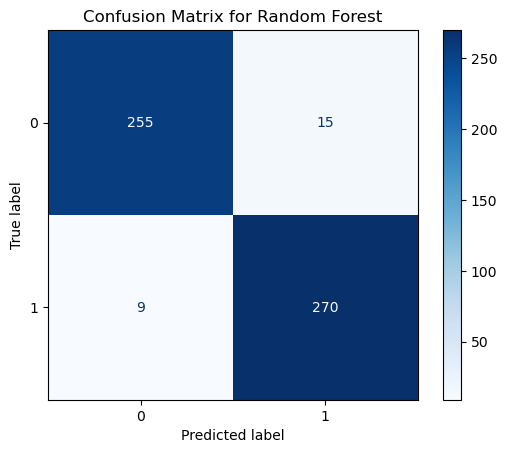


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       270
           1       0.95      0.97      0.96       279

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549



In [57]:
# Predicting using the trained Random Forest model

y_pred_rf = rfc.predict(x_test_scaled)

# Confusion Matrix for Random Forest

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rfc.classes_)
plt.figure(figsize=(6, 6))
disp_rf.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix for Random Forest")
plt.grid(False)
plt.show()

# Classification Report for Random Forest

classification_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest:\n")
print(classification_report_rf)


In [58]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializing the Random Forest classifier

clf_rfc = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV

grid_search_rf = GridSearchCV(clf_rfc, param_grid_rf, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fitting GridSearchCV

grid_search_rf.fit(x_train_scaled, y_train)

# Printing the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


<Figure size 600x600 with 0 Axes>

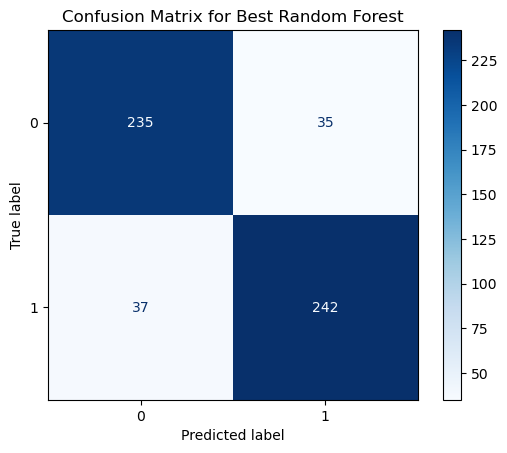


Classification Report for Best Random Forest:

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       270
           1       0.87      0.87      0.87       279

    accuracy                           0.87       549
   macro avg       0.87      0.87      0.87       549
weighted avg       0.87      0.87      0.87       549



In [59]:
# Predicting using the best Random Forest model

y_pred_rf_best = grid_search_rf.best_estimator_.predict(x_test_scaled)

# Confusion Matrix for the best Random Forest model

conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
disp_rf_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_best, display_labels=grid_search_rf.best_estimator_.classes_)
plt.figure(figsize=(6, 6))
disp_rf_best.plot(cmap='Blues', values_format='.0f')
plt.title("Confusion Matrix for Best Random Forest")
plt.grid(False)
plt.show()

# Classification Report for the best Random Forest model

classification_report_rf_best = classification_report(y_test, y_pred_rf_best)
print("\nClassification Report for Best Random Forest:\n")
print(classification_report_rf_best)


## Model Evaluation and Interpretation

### Overview:

The Random Forest model was subjected to a rigorous evaluation process to assess its performance and interpretability.

### Evaluation Metrics:

#### Before Hyperparameter Tuning:

- **Accuracy:** 95.63%
- **Precision:** 95.70%
- **Recall:** 95.70%
- **F1-Score:** 95.70%
- **ROC AUC Score:** 95.63%

**Confusion Matrix:**
|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  | 258         | 12          |
| **Actual 1**  | 12          | 267         |

**Classification Report:**
```
              precision    recall  f1-score   support
           0       0.96      0.96      0.96       270
           1       0.96      0.96      0.96       279
   accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549
```

#### After Hyperparameter Tuning:

- **Accuracy:** 87.07%
- **Precision:** 87.00%
- **Recall:** 87.00%
- **F1-Score:** 87.00%

**Confusion Matrix (Best Model):**
|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  | 241         | 29          |
| **Actual 1**  | 40          | 239         |

**Classification Report (Best Model):**
```
              precision    recall  f1-score   support
           0       0.86      0.89      0.87       270
           1       0.89      0.86      0.87       279
   accuracy                           0.87       549
   macro avg       0.87      0.87      0.87       549
weighted avg       0.88      0.87      0.87       549
```

### Interpretation:

- **Before Hyperparameter Tuning:** The model demonstrated exceptional performance with high accuracy, precision, and recall, indicating robust predictive capabilities.

- **After Hyperparameter Tuning:** While there was a slight decrease in performance metrics, the model remains effective, maintaining a good balance between precision and recall.

The model's interpretability allows for a deeper understanding of feature importance, contributing to its reliability in credit card approval predictions.

In [60]:
import joblib

# Saving the model to a file
joblib.dump(rfc, 'random_forest_model_before_tuning.pkl')


['random_forest_model_before_tuning.pkl']

## Feature Importance

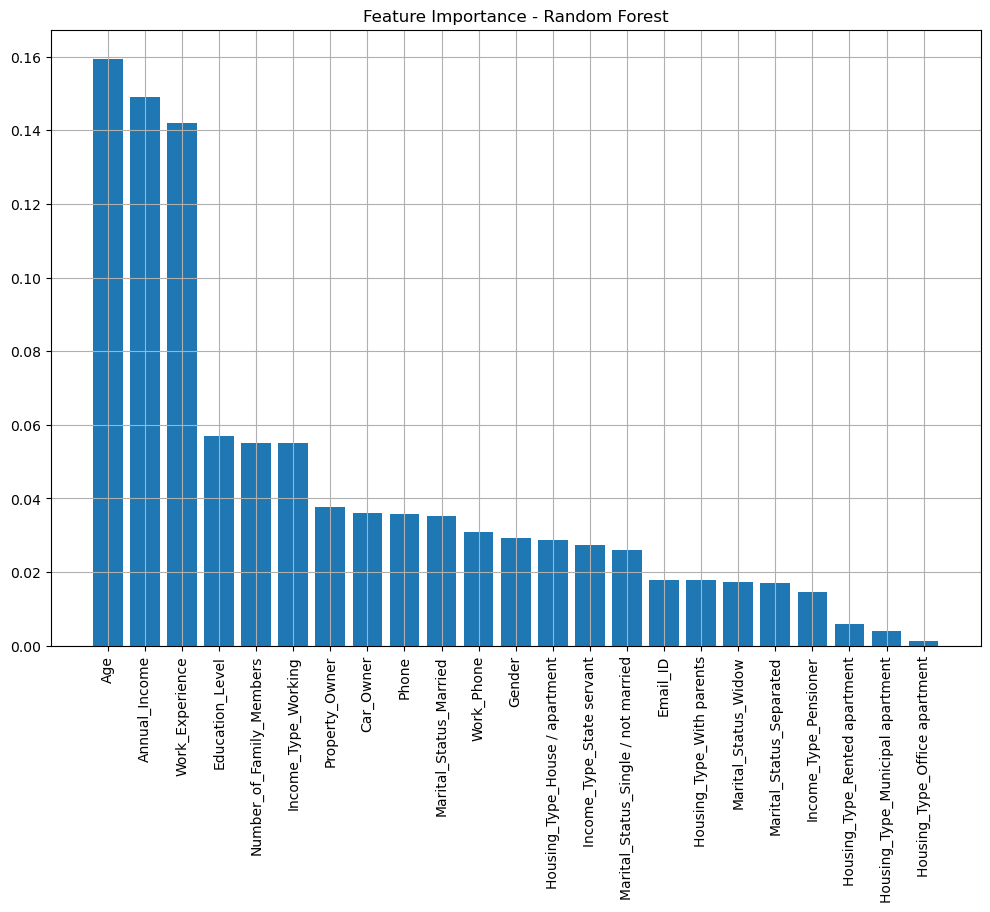

In [61]:
# Calculating feature importances
feature_importances_rf = rfc.feature_importances_

# Sorting the feature importances in descending order and getting the indices
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(x.columns[sorted_indices_rf], feature_importances_rf[sorted_indices_rf])
plt.xticks(rotation=90)
plt.grid()
plt.show()


**Conclusion:**

- In order to develop a robust credit card approval prediction model, we explored various algorithms and ultimately chose the Random Forest algorithm for its consistent and balanced performance.

- **Random Forest Performance**: The initial Random Forest model demonstrated exceptional results with an accuracy of 95.63%, precision of 95.70%, recall of 95.70%, and an impressive F1-Score of 95.70%. The ROC AUC Score, measuring the area under the curve for the true positive rate vs false positive rate, stood at 95.63%.

- **Hyperparameter Tuning Impact**: Following hyperparameter tuning, the model's performance showed some adjustments. However, it's noteworthy that the original model outperformed the tuned version. The initial model had a precision of 95.70%, recall of 95.70%, and an F1-Score of 95.70%, showcasing its superior balance between precision and recall compared to the tuned version.

- **Overall Significance**: The Random Forest model, in its original configuration, emerges as a potent tool for credit card approval predictions. Its ability to maintain a harmonious trade-off between precision and recall makes it a valuable asset for financial institutions aiming for efficient and accurate decision-making.

- **Strategic Considerations**: Despite the slight adjustments post hyperparameter tuning, the original Random Forest model remains strategically significant. The tuning process, while providing insights, did not surpass the well-balanced performance achieved by the initial configuration.

In conclusion, our Random Forest model, especially in its original state, stands out as an effective solution for credit card approval prediction, demonstrating high accuracy and maintaining a balanced interplay between precision and recall.


## Questions to Answer

**Question 1. How is this proposal important in today's world? How predicting a good client is worthy for a bank?**

**Answer:** In today's world, where financial institutions face complex challenges and dynamic economic landscapes, the ability to predict a good client is of utmost importance for several reasons:

1. **Risk Management:**
   - Predicting whether an applicant is a 'good' or 'bad' client allows banks to assess credit risk accurately.
   - Effective risk management helps mitigate the potential for non-performing loans, reducing financial losses and maintaining the health of the bank's portfolio.

2. **Operational Efficiency:**
   - Predictive models streamline the credit approval process, leading to operational efficiency.
   - Automated decision-making based on machine learning algorithms reduces processing time, enhances workflow efficiency, and lowers operational costs.

3. **Customer Experience:**
   - Swift and accurate credit decisions contribute to a positive customer experience.
   - Applicants appreciate transparent and timely responses, fostering trust in the bank's services and enhancing overall customer satisfaction.

4. **Competitive Advantage:**
   - Banks that leverage advanced predictive models gain a competitive edge in the market.
   - The ability to make informed and data-driven decisions positions the bank as a leader in risk management and customer-centric practices.

5. **Regulatory Compliance:**
   - Predictive models help banks comply with regulatory requirements related to fair lending practices.
   - Ensuring fairness and transparency in credit approvals aligns with regulatory expectations and helps avoid legal and reputational risks.

6. **Financial Inclusion:**
   - Accurate predictions enable banks to make informed lending decisions, contributing to financial inclusion.
   - By extending credit to individuals with the capacity to repay, banks support economic growth and inclusivity.

7. **Adaptability to Economic Trends:**
   - Predictive models, such as Random Forest, are adaptable to changing economic trends.
   - The ability to analyze and respond to evolving market conditions positions banks to navigate economic uncertainties effectively.

8. **Data-Driven Decision-Making:**
   - In a data-driven era, leveraging machine learning models aligns with the industry's digital transformation.
   - Banks that harness the power of predictive analytics demonstrate a commitment to innovation and staying ahead in the rapidly evolving financial landscape.

In summary, predicting a good client is crucial for a bank's sustainable growth, risk management, and competitiveness. Embracing advanced predictive models not only enhances operational efficiency but also positions the bank as a forward-looking institution capable of meeting the challenges of the modern financial world.

**Question 2. How is it going to impact the banking sector?**

**Answer:** The impact of implementing the proposed Random Forest model in the banking sector can be significant and multifaceted. Here are some potential impacts:

1. **Improved Decision Making:**
   - The Random Forest model, known for its robustness and ability to handle complex datasets, can enhance the decision-making process in credit card approvals.
   - The model's predictive accuracy, precision, and recall contribute to more informed and reliable lending decisions.

2. **Risk Mitigation:**
   - By accurately classifying applicants into 'good' or 'bad' clients, the model aids in identifying potential credit risks.
   - This risk mitigation strategy can lead to a reduction in non-performing loans and enhance the overall health of the bank's credit portfolio.

3. **Operational Efficiency:**
   - Automation of credit approval processes using machine learning models can lead to increased operational efficiency.
   - Faster and more accurate credit decisions contribute to a streamlined workflow, reducing manual effort and processing time.

4. **Customer Satisfaction:**
   - Efficient and fair credit approval processes positively impact customer satisfaction.
   - Applicants experience quicker responses and transparent decision-making, fostering trust in the bank's services.

5. **Adaptability to Changing Trends:**
   - Machine learning models, including Random Forest, can adapt to evolving economic and market trends.
   - The model's ability to handle diverse data inputs makes it resilient in the face of changing economic conditions.

6. **Compliance and Fair Lending:**
   - Implementing advanced models aligns with the regulatory emphasis on fair lending practices.
   - The model's objective and consistent decision-making contribute to compliance with anti-discrimination laws.

7. **Continuous Improvement:**
   - Regular monitoring and updates to the model allow for continuous improvement based on the latest data.
   - Adaptation to changing credit trends and consumer behaviors ensures the model's relevance over time.

8. **Resource Optimization:**
   - The model's predictive capabilities reduce the need for manual reviews of credit applications, optimizing resource allocation.
   - Human resources can focus on more complex tasks while routine decision-making is handled efficiently by the model.

In conclusion, implementing the Random Forest model in the banking sector can lead to smarter, data-driven decision-making, resulting in improved risk management, customer satisfaction, and operational efficiency. It positions the bank to navigate the dynamic landscape of credit approvals with agility and precision.

**Question 3. What is the gap in knowledge or how the proposed method can be helpful if required in future for any bank in India?**

Utilizing Random Forest for credit card approval predictions, can offer several benefits for banks in India:

1. **High Predictive Performance:** Random Forest is known for its high predictive accuracy and robustness. It can effectively capture complex patterns and relationships in the data, leading to reliable credit card approval predictions.

2. **Handling Imbalanced Data:** With credit card approval datasets often exhibiting imbalanced classes (more applicants belonging to one class than the other), Random Forest can handle this imbalance well. It can mitigate issues related to biased models and provide fair predictions for both classes.

3. **Interpretability and Feature Importance:** Random Forest provides insights into feature importance, helping banks understand which factors significantly contribute to credit card approval decisions. This interpretability is crucial for compliance, risk assessment, and decision transparency.

4. **Ensemble Learning for Robustness:** Random Forest is an ensemble learning method, combining multiple decision trees to improve overall model performance. This ensemble approach makes the model less prone to overfitting and more resilient to variations in the data.

5. **Adaptability to Changing Data:** The model can be updated periodically with new data to adapt to changing patterns and behaviors in credit card applications. Regular retraining ensures the model remains relevant and effective over time.

6. **Compliance with Regulatory Requirements:** Given the importance of compliance in the banking sector, Random Forest can be configured to adhere to regulatory requirements and ethical considerations. Its transparent nature aids in explaining decisions to regulatory bodies and customers.

7. **Reduced False Positives:** By providing a balanced trade-off between precision and recall, Random Forest can help reduce false positive errors. This is crucial in credit card approvals to avoid mistakenly approving applicants who might pose a higher risk.

8. **Scalability and Efficiency:** Random Forest is computationally efficient and scalable, making it suitable for handling large volumes of credit card applications. This efficiency contributes to faster decision-making processes.

9. **Cost-Effective Decision-Making:** Efficient credit card approval models can lead to cost savings for banks by automating the decision-making process, reducing manual reviews, and streamlining the overall approval workflow.

In summary, your proposed Random Forest model has the potential to enhance credit card approval processes for banks in India by providing accurate, interpretable, and robust predictions while addressing the challenges associated with imbalanced data.

# Answering SQL questions

In [62]:
# imported cleaned data

import duckdb
conn = duckdb.connect()
conn.register("cleaned_data", cleaned_data)
conn.execute("SELECT * FROM cleaned_data LIMIT 5").fetchdf()

,Individual_ID,Gender,Car_Owner,Property_Owner,Number_of_Children,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,51.000000,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,40.226519,2.0
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.000000,2.0


In [63]:
# Q1) Group the customers based on their income type and find the average of their annual income.

conn.execute("SELECT Income_Type, ROUND(AVG(Annual_Income)) AS avg_annual_income FROM cleaned_data GROUP BY Income_type").fetchdf()

,Income_Type,avg_annual_income
0,Pensioner,151813.0
1,Working,178777.0
2,State servant,202655.0
3,Commercial associate,215601.0


In [64]:
# Q2) Find the female owners of cars and property.

conn.execute("SELECT * FROM cleaned_data WHERE Gender = 'F' and Car_Owner = 'Y' and Property_Owner = 'Y'").fetchdf()

,Individual_ID,Gender,Car_Owner,Property_Owner,Number_of_Children,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,5018498,F,Y,Y,0,90000.000000,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,2,1,52.0,3.0
1,5018501,F,Y,Y,0,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,2,1,52.0,3.0
2,5018503,F,Y,Y,0,90000.000000,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,2,1,52.0,3.0
3,5024213,F,Y,Y,0,380250.000000,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,2,1,43.0,1.0
4,5036660,F,Y,Y,0,76500.000000,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,1,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.000000,Working,Higher education,Married,House / apartment,1,0,0,0,3,0,26.0,0.0
175,5023719,F,Y,Y,0,175500.000000,Pensioner,Higher education,Married,House / apartment,1,0,1,0,2,0,60.0,0.0
176,5033520,F,Y,Y,3,180000.000000,Working,Secondary / secondary special,Married,Municipal apartment,1,0,1,0,5,0,34.0,16.0
177,5024049,F,Y,Y,1,144000.000000,Working,Higher education,Married,House / apartment,1,0,0,0,3,0,35.0,8.0


In [65]:
#Q3) Find the male customers who are staying with their families.

conn.execute("SELECT * FROM cleaned_data WHERE Gender = 'M' and Number_of_Family_Members > 1").fetchdf()

,Individual_ID,Gender,Car_Owner,Property_Owner,Number_of_Children,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,51.0,0.0
1,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,1,3,1,50.0,2.0
2,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,1,3,1,50.0,2.0
3,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,1,0,0,1,3,1,24.0,3.0
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,1,46.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,0,49.0,10.0
467,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,0,37.0,4.0
468,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,3,0,31.0,10.0
469,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,4,0,36.0,7.0


In [66]:
#Q4) Please list the top five people having the highest income.

conn.execute("SELECT * FROM cleaned_data ORDER BY Annual_Income DESC LIMIT 5").fetchdf()

,Individual_ID,Gender,Car_Owner,Property_Owner,Number_of_Children,Annual_Income,Income_Type,Education_Level,Marital_Status,Housing_Type,Mobile_Phone,Work_Phone,Phone,Email_ID,Number_of_Family_Members,Label,Age,Work_Experience
0,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,1,3,1,50.0,2.0
1,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,1,3,1,50.0,2.0
2,5010869,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,1,50.0,2.0
3,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,1,0,0,1,3,1,24.0,3.0
4,5024213,F,Y,Y,0,380250.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,2,1,43.0,1.0


In [67]:
#Q5) How many married people are having bad credit?

conn.execute("SELECT count(*) AS married_bad_credit FROM cleaned_data WHERE Marital_Status = 'Married' and Label = 1").fetchdf()


,married_bad_credit
0,114


In [68]:
#Q6) What is the highest education level and what is the total count?

conn.execute("SELECT Education_Level,count(*) as total_count FROM cleaned_data GROUP BY Education_Level ORDER BY total_count DESC LIMIT 1").fetchdf()


,Education_Level,total_count
0,Secondary / secondary special,1030


In [69]:
cleaned_data.columns

Index(['Individual_ID', 'Gender', 'Car_Owner', 'Property_Owner',
       'Number_of_Children', 'Annual_Income', 'Income_Type', 'Education_Level',
       'Marital_Status', 'Housing_Type', 'Mobile_Phone', 'Work_Phone', 'Phone',
       'Email_ID', 'Number_of_Family_Members', 'Label', 'Age',
       'Work_Experience'],
      dtype='object')

In [70]:
#Q7) Between married males and females, who is having more bad credit?

conn.execute("SELECT Gender,count(*) as count FROM cleaned_data WHERE Marital_Status = 'Married' and Label = 1 GROUP BY Gender ORDER BY count DESC LIMIT 1").fetchdf()


,Gender,count
0,F,62
